# XBeach Post Process


#### Initialize XBeach Libraries

In [1]:
import sys;sys.path.append('../xbeach/')
from importlib import reload
#from libs import *
from scipy.io import loadmat
#import xbeach
#import utils
#import xbeach_inputs as xbi
from IPython.display import IFrame
import utm
from mpl_toolkits.basemap import Basemap
import netCDF4 as nc4
import pathlib as pl
import geopandas as gpd
import matplotlib.tri as tri
import numpy as np
import scipy.interpolate
import matplotlib.pyplot as plt
#import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes

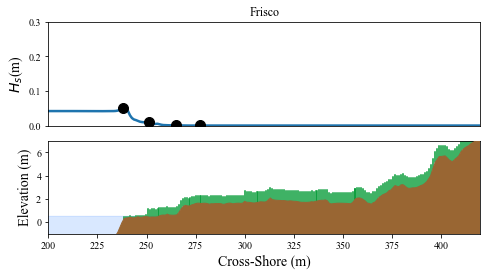

In [35]:
root = pl.Path('/Users/tmiesse/work/FHRL/dunex/modeling/xbeach/1d_frisco')
obs_dist = [238.,251.06,265,277]
event4 = [0.0505,0.011,0.00165,0.0015]
xb2 = nc4.Dataset(root/'run1' / 'event.nc')
#xb3 = nc4.Dataset(root/'run2' / 'event.nc')
#xb4 = nc4.Dataset(root/'run3' / 'event.nc')
start = '2020-08-02 18:00:00.000'
freq = '20min'
timedelta = pd.date_range(start=start,periods=int(len(xb2.variables['H_mean'][:,0])),freq=freq)
color1,color2='#1e74ae','#da8b8b'
color3,color4='#88ce4b','#8f8c8b'
color5,color6='#ad841c','#994F00'
width=2.5
plt.rcParams["font.family"] = "Times New Roman"
fig = plt.figure(figsize=(6,3))
ax1 = plt.axes([0,.5,1,.48])
ax2 = plt.axes([0,0,1,.43])
ii = 23
time = 39
# xbeach output variables
z2 = xb2.variables['zb_mean'][0,:][0] # model elevation
t2 = xb2.variables['meantime'][:] # model time 
h2 = xb2.variables['H_mean'][:] # model wave height
zs2 = xb2.variables['zs'][:] # model water level
x2 = xb2.variables['globalx'][:,:]

# finds vege based on elevation
vege = []
for ii in range(0,len(z2[:])):
    if z2[ii]>0.1:
        if 225<x2[ii]<250:
            vege.append(0.104)
        elif 250<x2[ii]<300:
            vege.append(0.65)
        elif 300<x2[ii]:
            vege.append(0.89)
    else:
        vege.append(0)

ax1.plot(x2[:,0],h2[time,0,:],color=color1,label='Hs 0.5m',linewidth=width)
#ax1.plot(x2[:,0],xb3.variables['H_mean'][time,0,:],color=color2,label='Hs 0.25m',linewidth=width)
#ax1.plot(x2[:,0],xb4.variables['H_mean'][time,0,:],color=color3,label='Hs 0.1m',linewidth=width)
ax1.plot(obs_dist[0],event4[0],color='k',marker='.',markersize=20)
ax1.plot(obs_dist[1],event4[1],color='k',marker='.',markersize=20)
ax1.plot(obs_dist[2],event4[2],color='k',marker='.',markersize=20)
ax1.plot(obs_dist[3],event4[3],color='k',marker='.',markersize=20)

# plotting vegetation
for ii in range(0,len(vege)):
    vege2 = ax2.plot((x2[ii],x2[ii]),(z2[ii],z2[ii]+vege[ii]),color='#009933')
ax2.fill_between(x2[:,0],zs2[time,0,:],-3,color='#0066ff',alpha=0.15)
ax2.fill_between(x2[:,0],z2[:],-3,color='#996633',zorder=3)
ax1.set_ylim([-.0,0.3]),ax2.set_ylim([-1,7])
ax1.set_xlim([200,420.]),ax2.set_xlim([200,420.])
ax1.set_xticks([])
ax1.set_ylabel('$H_{s}$(m)',fontsize=14),ax2.set_ylabel('Elevation (m)',fontsize=14)
ax2.set_xlabel('Cross-Shore (m)',fontsize=14)
ax1.set_title('Frisco')
plt.savefig('wave_event2_nc.png',dpi=600,bbox_inches = 'tight', pad_inches = 0.01)
plt.show()


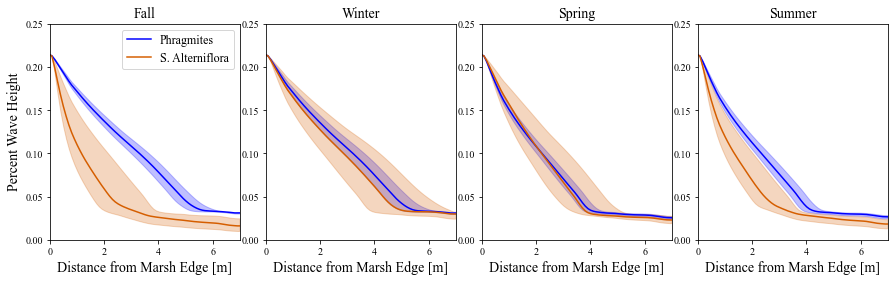

In [3]:
root = pl.Path('/Users/tmiesse/work/FHRL/eeslr/modelling/xbeach/dan_study/new_grid/response2reviews/seasonality3')
files = list((root / 'outputs').glob('*.nc'))
plt.rcParams["font.family"] = "Times New Roman"
fig = plt.figure(figsize=(12,3),frameon=True)
#ax1=plt.axes([0,0.,1,1])
ax1,ax2= plt.axes([0,0.,.22,1]),plt.axes([0.25,0.,0.22,1])
ax3,ax4 = plt.axes([0.50,0.,0.22,1]),plt.axes([0.75,0.,0.22,1]) 
colors = ['#b45b1f','#0000FF','#edb692']
c2 = ['#1f78b4','#d55e00','#a8d3f0']
i = 2
idx = 116
season = ['fall','winter','spring','summer']
phrag = {'fall':{'min':[],'ave':[],'max':[]},
        'winter':{'min':[],'ave':[],'max':[]},
        'spring':{'min':[],'ave':[],'max':[]},
        'summer':{'min':[],'ave':[],'max':[]}}
spart = {'fall':{'min':[],'ave':[],'max':[]},
        'winter':{'min':[],'ave':[],'max':[]},
        'spring':{'min':[],'ave':[],'max':[]},
        'summer':{'min':[],'ave':[],'max':[]}}
for f in files:
    xb = nc4.Dataset(f)
    x = xb.variables['globalx'][:,0]-11.7
    for s in season:
        if 'nothing' in f.name:
            pass
        elif (s in f.name.split('_')[0]):
            if ('ph_max' in f.name.split(s)[1].split('.')[0]):
                phrag[s]['max'] = (xb.variables['H_mean'][i,0,:])#/xb.variables['H_mean'][i,:,idx])*100
            elif ('ph1' in f.name.split(s)[1].split('.')[0]):
                phrag[s]['ave']= (xb.variables['H_mean'][i,0,:])#/xb.variables['H_mean'][i,:,idx])*100
            elif ('ph_min' in f.name.split(s)[1].split('.')[0]):
                phrag[s]['min'] = (xb.variables['H_mean'][i,0,:])#/xb.variables['H_mean'][i,:,idx])*100

            elif ('sp1' in f.name.split(s)[1].split('.')[0]):
                spart[s]['ave'] = (xb.variables['H_mean'][i,0,:])#/xb.variables['H_mean'][i,:,idx])*100
            elif ('sp_max' in f.name.split(s)[1].split('.')[0]):
                spart[s]['max'] = (xb.variables['H_mean'][i,0,:])#/xb.variables['H_mean'][i,:,idx])*100
            elif ('sp_min' in f.name.split(s)[1].split('.')[0]):
                spart[s]['min'] = (xb.variables['H_mean'][i,0,:])#/xb.variables['H_mean'][i,:,idx])*100


        

ax1.fill_between(x,phrag['fall']['max'],phrag['fall']['min'],color='#0000FF',alpha=0.25,zorder=1)
ax1.plot(x,phrag['fall']['ave'],color=colors[1],label='Phragmites')
ax1.fill_between(x,spart['fall']['max'],spart['fall']['min'],color='#d55e00',alpha=0.25,zorder=1)
ax1.plot(x,spart['fall']['ave'],color=c2[1],label='S. Alterniflora')

ax2.fill_between(x,phrag['winter']['max'],phrag['winter']['min'],color='#0000FF',alpha=0.25,zorder=1)
ax2.plot(x,phrag['winter']['ave'],color=colors[1],label='Phragmites')
ax2.fill_between(x,spart['winter']['max'],spart['winter']['min'],color='#d55e00',alpha=0.25,zorder=1)
ax2.plot(x,spart['winter']['ave'],color=c2[1],label='S. Alterniflora')

ax3.fill_between(x,phrag['spring']['max'],phrag['spring']['min'],color='#0000FF',alpha=0.25,zorder=1)
ax3.plot(x,phrag['spring']['ave'],color=colors[1],label='Phragmites')
ax3.fill_between(x,spart['spring']['max'],spart['spring']['min'],color='#d55e00',alpha=0.25,zorder=1)
ax3.plot(x,spart['spring']['ave'],color=c2[1],label='S. Alterniflora')

ax4.fill_between(x,phrag['summer']['max'],phrag['summer']['min'],color='#0000FF',alpha=0.25,zorder=1)
ax4.plot(x,phrag['summer']['ave'],color=colors[1],label='Phragmites')
ax4.fill_between(x,spart['summer']['max'],spart['summer']['min'],color='#d55e00',alpha=0.25,zorder=1)
ax4.plot(x,spart['summer']['ave'],color=c2[1],label='S. Alterniflora')

ax1.set_ylim([0,.25]),ax2.set_ylim([0,.25]),ax3.set_ylim([0,.25]),ax4.set_ylim([0,.25])
#ax2.yticks([]),ax3.yticks([])
ax1.set_title('Fall',fontsize=14),ax2.set_title('Winter',fontsize=14)
ax3.set_title('Spring',fontsize=14),ax4.set_title('Summer',fontsize=14)
ax1.set_xlim([0,7]),ax2.set_xlim([0,7.]),ax3.set_xlim([0,7.]),ax4.set_xlim([0,7.])
x_ticks = np.arange(0, 8, 2)
ax3.set_xticks(x_ticks)
ax1.set_ylabel('Percent Wave Height',fontsize=14)
ax1.set_xlabel('Distance from Marsh Edge [m]',fontsize=14)
ax2.set_xlabel('Distance from Marsh Edge [m]',fontsize=14)
ax3.set_xlabel('Distance from Marsh Edge [m]',fontsize=14)
ax4.set_xlabel('Distance from Marsh Edge [m]',fontsize=14)
ax1.legend(loc='upper right', ncol=1,frameon=True,fontsize=12)
plt.savefig('response_seasons_m.png',dpi=720,bbox_inches = 'tight', pad_inches = 0.01)
plt.show()


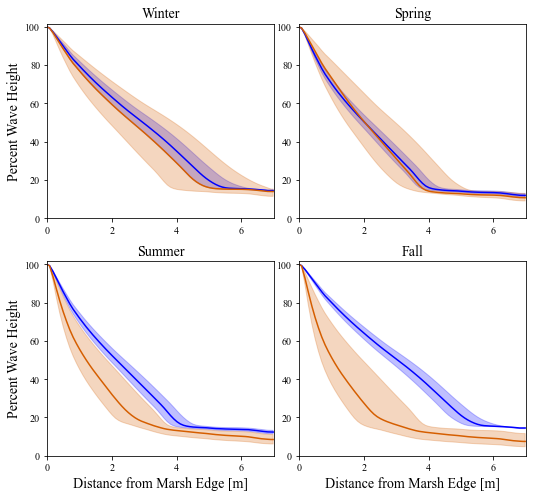

In [12]:
root = pl.Path('/Users/tmiesse/work/FHRL/eeslr/modelling/xbeach/dan_study/new_grid/response2reviews/seasonality3')
files = list((root / 'outputs').glob('*.nc'))
plt.rcParams["font.family"] = "Times New Roman"
fig = plt.figure(figsize=(7,6),frameon=True)
#ax1=plt.axes([0,0.,1,1])
ax1,ax2= plt.axes([0,0.55,.45,0.45]),plt.axes([0.5,0.55,0.45,0.45])
ax3,ax4 = plt.axes([0.0,0.,0.45,0.45]),plt.axes([0.5,0.,0.45,0.45]) 
colors = ['#b45b1f','#0000FF','#edb692']
c2 = ['#1f78b4','#d55e00','#a8d3f0']
i = 2
idx = 116
season = ['fall','winter','spring','summer']
phrag = {'fall':{'min':[],'ave':[],'max':[]},
        'winter':{'min':[],'ave':[],'max':[]},
        'spring':{'min':[],'ave':[],'max':[]},
        'summer':{'min':[],'ave':[],'max':[]}}
spart = {'fall':{'min':[],'ave':[],'max':[]},
        'winter':{'min':[],'ave':[],'max':[]},
        'spring':{'min':[],'ave':[],'max':[]},
        'summer':{'min':[],'ave':[],'max':[]}}
for f in files:
    xb = nc4.Dataset(f)
    x = xb.variables['globalx'][:,0]-11.7
    for s in season:
        if 'nothing' in f.name:
            pass
        elif (s in f.name.split('_')[0]):
            if ('ph_max' in f.name.split(s)[1].split('.')[0]):
                phrag[s]['max'] = (xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,idx])*100
            elif ('ph1' in f.name.split(s)[1].split('.')[0]):
                phrag[s]['ave']= (xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,idx])*100
            elif ('ph_min' in f.name.split(s)[1].split('.')[0]):
                phrag[s]['min'] = (xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,idx])*100

            elif ('sp1' in f.name.split(s)[1].split('.')[0]):
                spart[s]['ave'] = (xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,idx])*100
            elif ('sp_max' in f.name.split(s)[1].split('.')[0]):
                spart[s]['max'] = (xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,idx])*100
            elif ('sp_min' in f.name.split(s)[1].split('.')[0]):
                spart[s]['min'] = (xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,idx])*100

ax4.fill_between(x,phrag['fall']['max'],phrag['fall']['min'],color='#0000FF',alpha=0.25,zorder=1)
ax4.plot(x,phrag['fall']['ave'],color=colors[1],label='Phragmites')
ax4.fill_between(x,spart['fall']['max'],spart['fall']['min'],color='#d55e00',alpha=0.25,zorder=1)
ax4.plot(x,spart['fall']['ave'],color=c2[1],label='S. Alterniflora')

ax1.fill_between(x,phrag['winter']['max'],phrag['winter']['min'],color='#0000FF',alpha=0.25,zorder=1)
ax1.plot(x,phrag['winter']['ave'],color=colors[1],label='Phragmites')
ax1.fill_between(x,spart['winter']['max'],spart['winter']['min'],color='#d55e00',alpha=0.25,zorder=1)
ax1.plot(x,spart['winter']['ave'],color=c2[1],label='S. Alterniflora')

ax2.fill_between(x,phrag['spring']['max'],phrag['spring']['min'],color='#0000FF',alpha=0.25,zorder=1)
ax2.plot(x,phrag['spring']['ave'],color=colors[1],label='Phragmites')
ax2.fill_between(x,spart['spring']['max'],spart['spring']['min'],color='#d55e00',alpha=0.25,zorder=1)
ax2.plot(x,spart['spring']['ave'],color=c2[1],label='S. Alterniflora')

ax3.fill_between(x,phrag['summer']['max'],phrag['summer']['min'],color='#0000FF',alpha=0.25,zorder=1)
ax3.plot(x,phrag['summer']['ave'],color=colors[1],label='Phragmites')
ax3.fill_between(x,spart['summer']['max'],spart['summer']['min'],color='#d55e00',alpha=0.25,zorder=1)
ax3.plot(x,spart['summer']['ave'],color=c2[1],label='S. Alterniflora')

ax1.set_ylim([0,101.5]),ax2.set_ylim([0,101.5]),ax3.set_ylim([0,101.5]),ax4.set_ylim([0,101.5])
#ax2.yticks([]),ax3.yticks([])
ax4.set_title('Fall',fontsize=14),ax1.set_title('Winter',fontsize=14)
ax2.set_title('Spring',fontsize=14),ax3.set_title('Summer',fontsize=14)
ax1.set_xlim([0,7]),ax2.set_xlim([0,7.]),ax3.set_xlim([0,7.]),ax4.set_xlim([0,7.])
x_ticks = np.arange(0, 8, 2)
ax1.set_xticks(x_ticks),ax2.set_xticks(x_ticks)
ax3.set_xticks(x_ticks),ax4.set_xticks(x_ticks)
ax1.set_ylabel('Percent Wave Height',fontsize=14)
ax3.set_ylabel('Percent Wave Height',fontsize=14)
#ax1.set_xlabel('Distance from Marsh Edge [m]',fontsize=14)
#ax2.set_xlabel('Distance from Marsh Edge [m]',fontsize=14)
ax3.set_xlabel('Distance from Marsh Edge [m]',fontsize=14)
ax4.set_xlabel('Distance from Marsh Edge [m]',fontsize=14)
#ax1.legend(loc='upper right', ncol=1,frameon=True,fontsize=12)
plt.savefig('response_seasons4.png',dpi=720,bbox_inches = 'tight', pad_inches = 0.01)
plt.show()


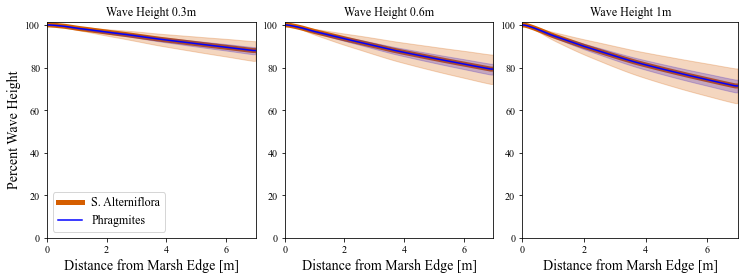

In [5]:
root = pl.Path('/Users/tmiesse/work/FHRL/eeslr/modelling/xbeach/dan_study/new_grid/synthetic')
files = list((root / 'outputs').glob('*.nc'))
plt.rcParams["font.family"] = "Times New Roman"
fig = plt.figure(figsize=(10,3),frameon=True)
#ax1=plt.axes([0,0.,1,1])
ax1,ax2= plt.axes([0,0.,.29,1]),plt.axes([0.33,0.,0.29,1])
ax3 = plt.axes([0.66,0.,0.3,1])  
colors = ['#b45b1f','#0000FF','#edb692']
c2 = ['#1f78b4','#d55e00','#a8d3f0']
i = 4
idx = 116
for f in files:
    xb = nc4.Dataset(f)
    x = xb.variables['globalx'][:,0]-11.7
    if 'nothing' in f.name:
        pass
    elif ('wl3' in f.name.split('_')[0]) & ('hs0.33' in f.name.split('_')[1]):
        if ('ah1.108' in f.name.split('_')[2]) & ('bv0.00502' in f.name.split('_')[3]) & ('nh220.36phrag4.nc' in f.name.split('_')[4]):
            c = colors[0]
            n = r'Phrag min'
            p11 = (xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,idx])*100
            #ax1.plot(x,p1,color=c)
        elif ('ah1.163' in f.name.split('_')[2]) & ('bv0.00514' in f.name.split('_')[3]) & ('nh238.4phrag4.nc' in f.name.split('_')[4]):
            c = colors[1]
            n = r'Phrag ave'
            p21 = (xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,idx])*100

            ax1.plot(x,p21,color=c,label='Phragmites')
        elif ('ah1.218' in f.name.split('_')[2]) & ('bv0.00527' in f.name.split('_')[3]) & ('nh256.4phrag4.nc' in f.name.split('_')[4]):
            c = colors[2]
            n = r'Phrag max'
            p31 = (xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,idx])*100
            #ax1.plot(x,p3,color=c)
        elif ('ah0.6176' in f.name.split('_')[2]) & ('bv0.00284' in f.name.split('_')[3]) & ('nh541.2spart4.nc' in f.name.split('_')[4]):
            c = c2[0]
            n = r'Spart min'
            s11 = (xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,idx])*100
            #ax1.plot(x,s1,color=c)
        elif ('ah0.6569' in f.name.split('_')[2]) & ('bv0.00305' in f.name.split('_')[3]) & ('nh771.4spart4.nc' in f.name.split('_')[4]):
            c = c2[1]
            n = r'Spart ave'
            s21 = (xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,idx])*100
            ax1.plot(x,s21,color=c,label='S. Alterniflora',zorder=-1,linewidth=5)
        elif ('ah0.6961' in f.name.split('_')[2]) & ('bv0.00327' in f.name.split('_')[3]) & ('nh1001.65spart4.nc' in f.name.split('_')[4]):
            c = c2[2]
            n = r'Spart max'
            s31 = (xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,idx])*100
            #ax1.plot(x,s3,color=c)


    elif ('wl3' in f.name.split('_')[0]) & ('hs0.63' in f.name.split('_')[1]):
        if ('ah1.108' in f.name.split('_')[2]) & ('bv0.00502' in f.name.split('_')[3]) & ('nh220.36phrag4.nc' in f.name.split('_')[4]):
            c = colors[0]
            n = r'Phrag min'
            p12 = (xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,idx])*100
            #ax1.plot(x,p1,color=c)
        elif ('ah1.163' in f.name.split('_')[2]) & ('bv0.00514' in f.name.split('_')[3]) & ('nh238.4phrag4.nc' in f.name.split('_')[4]):
            c = colors[1]
            n = r'Phrag ave'
            p22 = (xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,idx])*100

            ax2.plot(x,p22,color=c,label='Phragmites')
        elif ('ah1.218' in f.name.split('_')[2]) & ('bv0.00527' in f.name.split('_')[3]) & ('nh256.4phrag4.nc' in f.name.split('_')[4]):
            c = colors[2]
            n = r'Phrag max'
            p32 = (xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,idx])*100
            #ax1.plot(x,p3,color=c)
        elif ('ah0.6176' in f.name.split('_')[2]) & ('bv0.00284' in f.name.split('_')[3]) & ('nh541.2spart4.nc' in f.name.split('_')[4]):
            c = c2[0]
            n = r'Spart min'
            s12 = (xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,idx])*100
            #ax1.plot(x,s1,color=c)
        elif ('ah0.6569' in f.name.split('_')[2]) & ('bv0.00305' in f.name.split('_')[3]) & ('nh771.4spart4.nc' in f.name.split('_')[4]):
            c = c2[1]
            n = r'Spart ave'
            s22 = (xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,idx])*100
            ax2.plot(x,s22,color=c,label='S. Alterniflora',zorder=-1,linewidth=5)
        elif ('ah0.6961' in f.name.split('_')[2]) & ('bv0.00327' in f.name.split('_')[3]) & ('nh1001.65spart4.nc' in f.name.split('_')[4]):
            c = c2[2]
            n = r'Spart max'
            s32 = (xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,idx])*100
            #ax1.plot(x,s3,color=c)

    elif ('wl3' in f.name.split('_')[0]) & ('hs1.03' in f.name.split('_')[1]) :
        if ('ah1.108' in f.name.split('_')[2]) & ('bv0.00502' in f.name.split('_')[3]) & ('nh220.36phrag4.nc' in f.name.split('_')[4]):
            c = colors[0]
            n = r'Phrag min'
            p13 = (xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,idx])*100
            #ax1.plot(x,p1,color=c)
        elif ('ah1.163' in f.name.split('_')[2]) & ('bv0.00514' in f.name.split('_')[3]) & ('nh238.4phrag4.nc' in f.name.split('_')[4]):
            c = colors[1]
            n = r'Phrag ave'
            p23 = (xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,idx])*100

            ax3.plot(x,p23,color=c,label='Phragmites')
        elif ('ah1.218' in f.name.split('_')[2]) & ('bv0.00527' in f.name.split('_')[3]) & ('nh256.4phrag4.nc' in f.name.split('_')[4]):
            c = colors[2]
            n = r'Phrag max'
            p33 = (xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,idx])*100
            #ax1.plot(x,p3,color=c)
        elif ('ah0.6176' in f.name.split('_')[2]) & ('bv0.00284' in f.name.split('_')[3]) & ('nh541.2spart4.nc' in f.name.split('_')[4]):
            c = c2[0]
            n = r'Spart min'
            s13= (xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,idx])*100
            #ax1.plot(x,s1,color=c)
        elif ('ah0.6569' in f.name.split('_')[2]) & ('bv0.00305' in f.name.split('_')[3]) & ('nh771.4spart4.nc' in f.name.split('_')[4]):
            c = c2[1]
            n = r'Spart ave'
            s23 = (xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,idx])*100
            ax3.plot(x,s23,color=c,label='S. Alterniflora',zorder=-1,linewidth=5)
        elif ('ah0.6961' in f.name.split('_')[2]) & ('bv0.00327' in f.name.split('_')[3]) & ('nh1001.65spart4.nc' in f.name.split('_')[4]):
            c = c2[2]
            n = r'Spart max'
            s33 = (xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,idx])*100
            #ax1.plot(x,s3,color=c)
        
#xb =  nc4.Dataset('/Users/tmiesse/work/FHRL/eeslr/modelling/xbeach/dan_study/new_grid/synthetic/outputs/hs03nothing1.nc')
#n2 = (xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,idx])*100
#ax1.plot(x,n2,'--k',label='No Vege')
ax1.fill_between(x,p31,p11,color='#0000FF',alpha=0.25,zorder=1)
ax1.fill_between(x,s31,s11,color='#d55e00',alpha=0.25,zorder=1)

#xb =  nc4.Dataset('/Users/tmiesse/work/FHRL/eeslr/modelling/xbeach/dan_study/new_grid/synthetic/outputs/hs06nothing1.nc')
#n2 = (xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,idx])*100
#ax2.plot(x,n2,'--k',label='No Vege')
ax2.fill_between(x,p32,p12,color='#0000FF',alpha=0.25,zorder=1)
ax2.fill_between(x,s32,s12,color='#d55e00',alpha=0.25,zorder=1)

#xb =  nc4.Dataset('/Users/tmiesse/work/FHRL/eeslr/modelling/xbeach/dan_study/new_grid/synthetic/outputs/hs1nothing1.nc')
#n2 = (xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,idx])*100
#ax3.plot(x,n2,'--k',label='No Vege')
ax3.fill_between(x,p33,p13,color='#0000FF',alpha=0.25,zorder=1)
ax3.fill_between(x,s33,s13,color='#d55e00',alpha=0.25,zorder=1)   
#ax1.grid(),ax2.grid(),ax3.grid(),
ax1.set_ylim([0,101.5]),ax2.set_ylim([0,101.5]),ax3.set_ylim([0,101.5]),
#ax2.yticks([]),ax3.yticks([])
ax1.set_title('Wave Height 0.3m'),ax2.set_title('Wave Height 0.6m'),ax3.set_title('Wave Height 1m')
ax1.set_xlim([0,7]),ax2.set_xlim([0,7.]),ax3.set_xlim([0,7.])
x_ticks = np.arange(0, 8, 2)
ax3.set_xticks(x_ticks)
ax1.set_ylabel('Percent Wave Height',fontsize=14)
ax1.set_xlabel('Distance from Marsh Edge [m]',fontsize=14)
ax2.set_xlabel('Distance from Marsh Edge [m]',fontsize=14)
ax3.set_xlabel('Distance from Marsh Edge [m]',fontsize=14)

ax1.legend(loc='lower left', ncol=1,frameon=True,fontsize=12)
plt.savefig('wave_event4v2.png',dpi=600,bbox_inches = 'tight', pad_inches = 0.01)
plt.show()


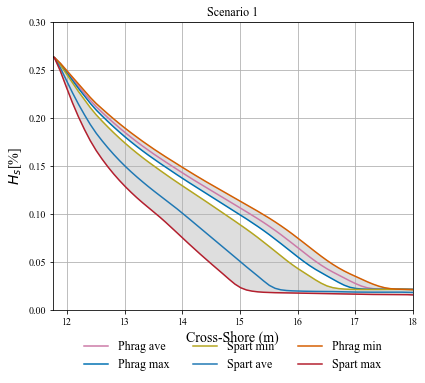

In [49]:
root = pl.Path('/Users/tmiesse/work/FHRL/eeslr/modelling/xbeach/dan_study/new_grid/synthetic')
files = list((root / 'outputs').glob('*.nc'))
plt.rcParams["font.family"] = "Times New Roman"
fig = plt.figure(figsize=(5,4),frameon=True)
ax1=plt.axes([0,0.,1,1])
#ax1,ax2= plt.axes([0,0.,.29,1]),plt.axes([0.33,0.,0.29,1])
#ax3 = plt.axes([0.66,0.,0.3,1])  
colors = ['#d55e00','#cc79a7','#0072b2','#009e73']
c2 = ['#b4a61f','#1f78b4','#b41f2e']
i = 4
idx = 119
for f in files:
    xb = nc4.Dataset(f)
    if ('wl0.75' in f.name.split('_')[0]) & ('hs0.33' in f.name.split('_')[1]):
        if ('ah1.108' in f.name.split('_')[2]) & ('bv0.00502' in f.name.split('_')[3]) & ('nh220.36phrag.nc' in f.name.split('_')[4]):
            c = colors[0]
            n = r'Phrag min'
            p1 = xb.variables['H_mean'][i,0,:]*1.225
            ax1.plot(xb.variables['globalx'][:,0],p1,color=c,label=n)
        elif ('ah1.163' in f.name.split('_')[2]) & ('bv0.00514' in f.name.split('_')[3]) & ('nh238.4phrag.nc' in f.name.split('_')[4]):
            c = colors[1]
            n = r'Phrag ave'
            p2 = xb.variables['H_mean'][i,0,:]*1.225
            ax1.plot(xb.variables['globalx'][:,0],p2,color=c,label=n)
        elif ('ah1.218' in f.name.split('_')[2]) & ('bv0.00527' in f.name.split('_')[3]) & ('nh256.4phrag.nc' in f.name.split('_')[4]):
            c = colors[2]
            n = r'Phrag max'
            p3 = xb.variables['H_mean'][i,0,:]*1.225
            ax1.plot(xb.variables['globalx'][:,0],p3,color=c,label=n)
        elif ('ah0.6176' in f.name.split('_')[2]) & ('bv0.00284' in f.name.split('_')[3]) & ('nh541.2spart.nc' in f.name.split('_')[4]):
            c = c2[0]
            n = r'Spart min'
            s1 = xb.variables['H_mean'][i,0,:]*1.225
            ax1.plot(xb.variables['globalx'][:,0],s1,color=c,label=n)
        elif ('ah0.6569' in f.name.split('_')[2]) & ('bv0.00305' in f.name.split('_')[3]) & ('nh771.4spart.nc' in f.name.split('_')[4]):
            c = c2[1]
            n = r'Spart ave'
            s2 = xb.variables['H_mean'][i,0,:]*1.225
            ax1.plot(xb.variables['globalx'][:,0],s2,color=c,label=n)
        elif ('ah0.6961' in f.name.split('_')[2]) & ('bv0.00327' in f.name.split('_')[3]) & ('nh1001.65spart.nc' in f.name.split('_')[4]):
            c = c2[2]
            n = r'Spart max'
            s3 = xb.variables['H_mean'][i,0,:]*1.225
            ax1.plot(xb.variables['globalx'][:,0],s3,color=c,label=n)

ax1.fill_between(xb.variables['globalx'][:,0],p3,p1,color='#bfbfbf',alpha=0.5)
ax1.fill_between(xb.variables['globalx'][:,0],s3,s1,color='#bfbfbf',alpha=0.5)
ax1.grid(),ax2.grid(),ax3.grid(),ax1.set_ylim([0,0.3]),
#ax2.set_ylim([0,105]),ax3.set_ylim([0,105])
ax1.set_title('Scenario 1')
ax1.set_xlim([11.75,18.]),ax2.set_xlim([12,18.]),ax3.set_xlim([12,18.])

ax1.set_ylabel('$H_{s}$[%]',fontsize=14)
ax1.set_xlabel('Cross-Shore (m)',fontsize=14)

ax1.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25),ncol=3,frameon=False,fontsize=12)
plt.savefig('wave_event1_meters.png',dpi=600,bbox_inches = 'tight', pad_inches = 0.01)
plt.show()


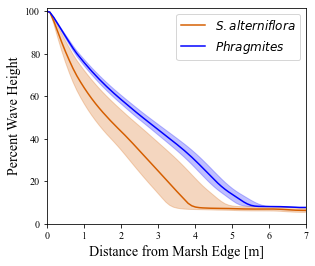

In [30]:
root = pl.Path('/Users/tmiesse/work/FHRL/eeslr/modelling/xbeach/dan_study/new_grid/synthetic')
files = list((root / 'outputs').glob('*.nc'))
plt.rcParams["font.family"] = "Times New Roman"
fig = plt.figure(figsize=(4,3),frameon=True)
#ax1=plt.axes([0,0.,1,1])
ax1= plt.axes([0,0.,.9,1])
colors = ['#b45b1f','#0000FF','#edb692']
c2 = ['#1f78b4','#d55e00','#a8d3f0']
i = 4
idx = 116
for f in files:
    xb = nc4.Dataset(f)
    x = xb.variables['globalx'][:,0]-11.7
    if 'nothing' in f.name:
        pass
    elif ('wl0.75' in f.name.split('_')[0]) & ('hs0.33' in f.name.split('_')[1]):
        if ('ah1.108' in f.name.split('_')[2]) & ('bv0.00502' in f.name.split('_')[3]) & ('nh220.36phrag1v2.nc' in f.name.split('_')[4]):
            c = colors[0]
            n = r'phrag1v2 min'
            p11 = (xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,idx])*100
            #ax1.plot(x,p1,color=c)
        elif ('ah1.163' in f.name.split('_')[2]) & ('bv0.00514' in f.name.split('_')[3]) & ('nh238.4phrag1v2.nc' in f.name.split('_')[4]):
            c = colors[1]
            n = r'phrag1v2 ave'
            p21 = (xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,idx])*100

            ax1.plot(x,p21,color=c,label='$\\it{Phragmites}$')
        elif ('ah1.218' in f.name.split('_')[2]) & ('bv0.00527' in f.name.split('_')[3]) & ('nh256.4phrag1v2.nc' in f.name.split('_')[4]):
            c = colors[2]
            n = r'phrag1v2 max'
            p31 = (xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,idx])*100
            #ax1.plot(x,p3,color=c)
        elif ('ah0.6176' in f.name.split('_')[2]) & ('bv0.00284' in f.name.split('_')[3]) & ('nh541.2spartv3.nc' in f.name.split('_')[4]):
            c = c2[0]
            n = r'spart1v2 min'
            s11 = (xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,idx])*100
            #ax1.plot(x,s1,color=c)
        elif ('ah0.6176' in f.name.split('_')[2]) & ('bv0.00305' in f.name.split('_')[3]) & ('nh771.4spartv3.nc' in f.name.split('_')[4]):
            c = c2[1]
            n = r'spart1v2 ave'
            s21 = (xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,idx])*100
            ax1.plot(x,s21,color=c,label='$\\it{S. alterniflora}$')
        elif ('ah0.6176' in f.name.split('_')[2]) & ('bv0.00327' in f.name.split('_')[3]) & ('nh1001.65spartv3.nc' in f.name.split('_')[4]):
            c = c2[2]
            n = r'spart1v2 max'
            s31 = (xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,idx])*100

#xb =  nc4.Dataset('/Users/tmiesse/work/FHRL/eeslr/modelling/xbeach/dan_study/new_grid/synthetic/outputs/hs03nothing1.nc')
#n2 = (xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,idx])*100
#ax1.plot(x,n2,'--k',label='No Vege')
ax1.fill_between(x,p31,p11,color='#0000FF',alpha=0.25,zorder=1)
ax1.fill_between(x,s31,s11,color='#d55e00',alpha=0.25,zorder=1)


ax1.set_ylim([0,101.5])#,ax2.set_ylim([0,101.5]),ax3.set_ylim([0,101.5]),
#ax2.yticks([]),ax3.yticks([])
#ax1.set_title('Wave Height 0.3m version 2')
ax1.set_xlim([0,7])#,ax2.set_xlim([0,7.]),ax3.set_xlim([0,7.])
ax1.legend(loc='upper right', ncol=1,frameon=True,fontsize=12)
ax1.set_ylabel('Percent Wave Height',fontsize=14)
ax1.set_xlabel('Distance from Marsh Edge [m]',fontsize=14)
plt.savefig('wave03_ver3.png',dpi=600,bbox_inches = 'tight', pad_inches = 0.01)
plt.show()

In [25]:
root = pl.Path('/Users/tmiesse/work/FHRL/eeslr/modelling/xbeach/dan_study/new_grid/response2reviews/seasonality3/spart')
direct = ['winter','fall','summer','spring']
dir2 = ['sp_max','sp1','sp_min']
for d in direct:
    for d2 in dir2:
        files = list((root / d / d2).glob('*.dat'))
        if files:
            for f in files:
                f.unlink()


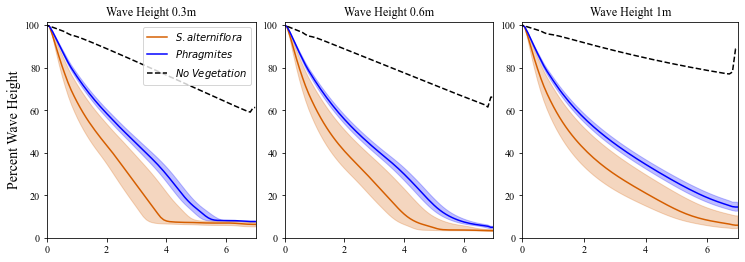

In [29]:
root = pl.Path('/Users/tmiesse/work/FHRL/eeslr/modelling/xbeach/dan_study/new_grid/synthetic')
files = list((root / 'outputs').glob('*.nc'))
plt.rcParams["font.family"] = "Times New Roman"
fig = plt.figure(figsize=(10,3),frameon=True)
#ax1=plt.axes([0,0.,1,1])
ax1,ax2= plt.axes([0,0.,.29,1]),plt.axes([0.33,0.,0.29,1])
ax3 = plt.axes([0.66,0.,0.3,1])  
colors = ['#b45b1f','#0000FF','#edb692']
c2 = ['#1f78b4','#d55e00','#a8d3f0']
i = 4
idx = 116
for f in files:
    xb = nc4.Dataset(f)
    x = xb.variables['globalx'][:,0]-11.7
    if 'nothing' in f.name:
        pass
    elif ('wl0.75' in f.name.split('_')[0]) & ('hs0.33' in f.name.split('_')[1]):
        if ('ah1.108' in f.name.split('_')[2]) & ('bv0.00502' in f.name.split('_')[3]) & ('nh220.36phrag1v2.nc' in f.name.split('_')[4]):
            c = colors[0]
            n = r'phrag1v2 min'
            p11 = (xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,idx])*100
            #ax1.plot(x,p1,color=c)
        elif ('ah1.163' in f.name.split('_')[2]) & ('bv0.00514' in f.name.split('_')[3]) & ('nh238.4phrag1v2.nc' in f.name.split('_')[4]):
            c = colors[1]
            n = r'phrag1v2 ave'
            p21 = (xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,idx])*100

            ax1.plot(x,p21,color=c,label='$\\it{Phragmites}$')
        elif ('ah1.218' in f.name.split('_')[2]) & ('bv0.00527' in f.name.split('_')[3]) & ('nh256.4phrag1v2.nc' in f.name.split('_')[4]):
            c = colors[2]
            n = r'phrag1v2 max'
            p31 = (xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,idx])*100
            #ax1.plot(x,p3,color=c)
        elif ('ah0.6176' in f.name.split('_')[2]) & ('bv0.00284' in f.name.split('_')[3]) & ('nh541.2spart1v2.nc' in f.name.split('_')[4]):
            c = c2[0]
            n = r'spart1v2 min'
            s11 = (xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,idx])*100
            #ax1.plot(x,s1,color=c)
        elif ('ah0.6569' in f.name.split('_')[2]) & ('bv0.00305' in f.name.split('_')[3]) & ('nh771.4spart1v2.nc' in f.name.split('_')[4]):
            c = c2[1]
            n = r'spart1v2 ave'
            s21 = (xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,idx])*100
            ax1.plot(x,s21,color=c,label='$\\it{S. alterniflora}$')
        elif ('ah0.6961' in f.name.split('_')[2]) & ('bv0.00327' in f.name.split('_')[3]) & ('nh1001.65spart1v2.nc' in f.name.split('_')[4]):
            c = c2[2]
            n = r'spart1v2 max'
            s31 = (xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,idx])*100
            #ax1.plot(x,s3,color=c)


    elif ('wl0.75' in f.name.split('_')[0]) & ('hs0.63' in f.name.split('_')[1]):
        if ('ah1.108' in f.name.split('_')[2]) & ('bv0.00502' in f.name.split('_')[3]) & ('nh220.36phrag1v2.nc' in f.name.split('_')[4]):
            c = colors[0]
            n = r'phrag1v2 min'
            p12 = (xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,idx])*100
            #ax1.plot(x,p1,color=c)
        elif ('ah1.163' in f.name.split('_')[2]) & ('bv0.00514' in f.name.split('_')[3]) & ('nh238.4phrag1v2.nc' in f.name.split('_')[4]):
            c = colors[1]
            n = r'phrag1v2 ave'
            p22 = (xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,idx])*100

            ax2.plot(x,p22,color=c,label='$\\it{Phragmites}$')
        elif ('ah1.218' in f.name.split('_')[2]) & ('bv0.00527' in f.name.split('_')[3]) & ('nh256.4phrag1v2.nc' in f.name.split('_')[4]):
            c = colors[2]
            n = r'phrag1v2 max'
            p32 = (xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,idx])*100
            #ax1.plot(x,p3,color=c)
        elif ('ah0.6176' in f.name.split('_')[2]) & ('bv0.00284' in f.name.split('_')[3]) & ('nh541.2spart1v2.nc' in f.name.split('_')[4]):
            c = c2[0]
            n = r'spart1v2 min'
            s12 = (xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,idx])*100
            #ax1.plot(x,s1,color=c)
        elif ('ah0.6569' in f.name.split('_')[2]) & ('bv0.00305' in f.name.split('_')[3]) & ('nh771.4spart1v2.nc' in f.name.split('_')[4]):
            c = c2[1]
            n = r'spart1v2 ave'
            s22 = (xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,idx])*100
            ax2.plot(x,s22,color=c,label='S. alterniflora')
        elif ('ah0.6961' in f.name.split('_')[2]) & ('bv0.00327' in f.name.split('_')[3]) & ('nh1001.65spart1v2.nc' in f.name.split('_')[4]):
            c = c2[2]
            n = r'spart1v2 max'
            s32 = (xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,idx])*100
            #ax1.plot(x,s3,color=c)

    elif ('wl0.75' in f.name.split('_')[0]) & ('hs1.03' in f.name.split('_')[1]) :
        if ('ah1.108' in f.name.split('_')[2]) & ('bv0.00502' in f.name.split('_')[3]) & ('nh220.36phrag1v2.nc' in f.name.split('_')[4]):
            c = colors[0]
            n = r'phrag1v2 min'
            p13 = (xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,idx])*100
            #ax1.plot(x,p1,color=c)
        elif ('ah1.163' in f.name.split('_')[2]) & ('bv0.00514' in f.name.split('_')[3]) & ('nh238.4phrag1v2.nc' in f.name.split('_')[4]):
            c = colors[1]
            n = r'phrag1v2 ave'
            p23 = (xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,idx])*100

            ax3.plot(x,p23,color=c,label='$\\it{Phragmites}$')
        elif ('ah1.218' in f.name.split('_')[2]) & ('bv0.00527' in f.name.split('_')[3]) & ('nh256.4phrag1v2.nc' in f.name.split('_')[4]):
            c = colors[2]
            n = r'phrag1v2 max'
            p33 = (xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,idx])*100
            #ax1.plot(x,p3,color=c)
        elif ('ah0.6176' in f.name.split('_')[2]) & ('bv0.00284' in f.name.split('_')[3]) & ('nh541.2spart1v2.nc' in f.name.split('_')[4]):
            c = c2[0]
            n = r'spart1v2 min'
            s13= (xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,idx])*100
            #ax1.plot(x,s1,color=c)
        elif ('ah0.6569' in f.name.split('_')[2]) & ('bv0.00305' in f.name.split('_')[3]) & ('nh771.4spart1v2.nc' in f.name.split('_')[4]):
            c = c2[1]
            n = r'spart1v2 ave'
            s23 = (xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,idx])*100
            ax3.plot(x,s23,color=c,label='S. Alterniflora')
        elif ('ah0.6961' in f.name.split('_')[2]) & ('bv0.00327' in f.name.split('_')[3]) & ('nh1001.65spart1v2.nc' in f.name.split('_')[4]):
            c = c2[2]
            n = r'spart1v2 max'
            s33 = (xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,idx])*100
            #ax1.plot(x,s3,color=c)
        
xb =  nc4.Dataset('/Users/tmiesse/work/FHRL/eeslr/modelling/xbeach/dan_study/new_grid/synthetic/outputs/hs03nothing1.nc')
n2 = (xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,idx])*100
ax1.plot(x,n2,'--k',label='$\\it{No}$ $\\it{Vegetation}$')
ax1.fill_between(x,p31,p11,color='#0000FF',alpha=0.25,zorder=1)
ax1.fill_between(x,s31,s11,color='#d55e00',alpha=0.25,zorder=1)

xb =  nc4.Dataset('/Users/tmiesse/work/FHRL/eeslr/modelling/xbeach/dan_study/new_grid/synthetic/outputs/hs06nothing1.nc')
n2 = (xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,idx])*100
ax2.plot(x,n2,'--k',label='No Vege')
ax2.fill_between(x,p32,p12,color='#0000FF',alpha=0.25,zorder=1)
ax2.fill_between(x,s32,s12,color='#d55e00',alpha=0.25,zorder=1)

xb =  nc4.Dataset('/Users/tmiesse/work/FHRL/eeslr/modelling/xbeach/dan_study/new_grid/synthetic/outputs/hs1nothing1.nc')
n2 = (xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,idx])*100
ax3.plot(x,n2,'--k',label='No Vege')
ax3.fill_between(x,p33,p13,color='#0000FF',alpha=0.25,zorder=1)
ax3.fill_between(x,s33,s13,color='#d55e00',alpha=0.25,zorder=1)   
#ax1.grid(),ax2.grid(),ax3.grid(),
ax1.set_ylim([0,101.5]),ax2.set_ylim([0,101.5]),ax3.set_ylim([0,101.5]),
#ax2.yticks([]),ax3.yticks([])
ax1.set_title('Wave Height 0.3m'),ax2.set_title('Wave Height 0.6m'),ax3.set_title('Wave Height 1m')
ax1.set_xlim([0,7]),ax2.set_xlim([0,7.]),ax3.set_xlim([0,7.])

ax1.set_ylabel('Percent Wave Height',fontsize=14)
#ax1.set_xlabel('Distance from Marsh Edge [m]',fontsize=14)
#ax2.set_xlabel('Distance from Marsh Edge [m]',fontsize=14)
#ax3.set_xlabel('Distance from Marsh Edge [m]',fontsize=14)
x_ticks = np.arange(0, 8, 2)
ax3.set_xticks(x_ticks)
ax1.legend(loc='upper right', ncol=1,frameon=True,fontsize=10)
plt.savefig('wave_event1_update.png',dpi=600,bbox_inches = 'tight', pad_inches = 0.01)
plt.show()


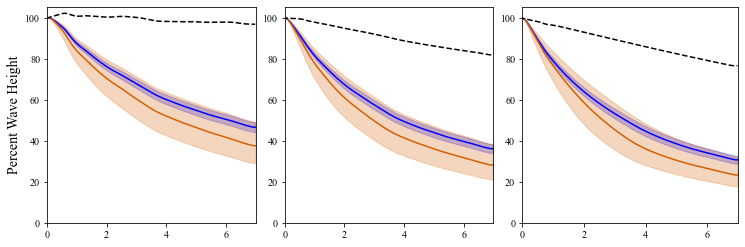

In [26]:
root = pl.Path('/Users/tmiesse/work/FHRL/eeslr/modelling/xbeach/dan_study/new_grid/synthetic')
files = list((root / 'outputs').glob('*.nc'))
plt.rcParams["font.family"] = "Times New Roman"
fig = plt.figure(figsize=(10,3),frameon=True)
#ax1=plt.axes([0,0.,1,1])
ax1,ax2= plt.axes([0,0.,.29,1]),plt.axes([0.33,0.,0.29,1])
ax3 = plt.axes([0.66,0.,0.3,1])  
colors = ['#b45b1f','#0000FF','#edb692']
c2 = ['#1f78b4','#d55e00','#a8d3f0']
i = 4
idx = 116
for f in files:
    xb = nc4.Dataset(f)
    x = xb.variables['globalx'][:,0]-11.7
    if 'nothing' in f.name:
        pass
    elif ('wl1.4' in f.name.split('_')[0]) & ('hs0.33' in f.name.split('_')[1]):
        if ('ah1.108' in f.name.split('_')[2]) & ('bv0.00502' in f.name.split('_')[3]) & ('nh220.36phrag2.nc' in f.name.split('_')[4]):
            c = colors[0]
            n = r'Phrag min'
            p11 = (xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,idx])*100
            #ax1.plot(x,p1,color=c)
        elif ('ah1.163' in f.name.split('_')[2]) & ('bv0.00514' in f.name.split('_')[3]) & ('nh238.4phrag2.nc' in f.name.split('_')[4]):
            c = colors[1]
            n = r'Phrag ave'
            p21 = (xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,idx])*100

            ax1.plot(x,p21,color=c,label='Phragmites')
        elif ('ah1.218' in f.name.split('_')[2]) & ('bv0.00527' in f.name.split('_')[3]) & ('nh256.4phrag2.nc' in f.name.split('_')[4]):
            c = colors[2]
            n = r'Phrag max'
            p31 = (xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,idx])*100
            #ax1.plot(x,p3,color=c)
        elif ('ah0.6176' in f.name.split('_')[2]) & ('bv0.00284' in f.name.split('_')[3]) & ('nh541.2spart2.nc' in f.name.split('_')[4]):
            c = c2[0]
            n = r'Spart min'
            s11 = (xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,idx])*100
            #ax1.plot(x,s1,color=c)
        elif ('ah0.6569' in f.name.split('_')[2]) & ('bv0.00305' in f.name.split('_')[3]) & ('nh771.4spart2.nc' in f.name.split('_')[4]):
            c = c2[1]
            n = r'Spart ave'
            s21 = (xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,idx])*100
            ax1.plot(x,s21,color=c,label='S. Alterniflora')
        elif ('ah0.6961' in f.name.split('_')[2]) & ('bv0.00327' in f.name.split('_')[3]) & ('nh1001.65spart2.nc' in f.name.split('_')[4]):
            c = c2[2]
            n = r'Spart max'
            s31 = (xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,idx])*100
            #ax1.plot(x,s3,color=c)


    elif ('wl1.4' in f.name.split('_')[0]) & ('hs0.63' in f.name.split('_')[1]):
        if ('ah1.108' in f.name.split('_')[2]) & ('bv0.00502' in f.name.split('_')[3]) & ('nh220.36phrag2.nc' in f.name.split('_')[4]):
            c = colors[0]
            n = r'Phrag min'
            p12 = (xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,idx])*100
            #ax1.plot(x,p1,color=c)
        elif ('ah1.163' in f.name.split('_')[2]) & ('bv0.00514' in f.name.split('_')[3]) & ('nh238.4phrag2.nc' in f.name.split('_')[4]):
            c = colors[1]
            n = r'Phrag ave'
            p22 = (xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,idx])*100

            ax2.plot(x,p22,color=c,label='Phragmites')
        elif ('ah1.218' in f.name.split('_')[2]) & ('bv0.00527' in f.name.split('_')[3]) & ('nh256.4phrag2.nc' in f.name.split('_')[4]):
            c = colors[2]
            n = r'Phrag max'
            p32 = (xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,idx])*100
            #ax1.plot(x,p3,color=c)
        elif ('ah0.6176' in f.name.split('_')[2]) & ('bv0.00284' in f.name.split('_')[3]) & ('nh541.2spart2.nc' in f.name.split('_')[4]):
            c = c2[0]
            n = r'Spart min'
            s12 = (xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,idx])*100
            #ax1.plot(x,s1,color=c)
        elif ('ah0.6569' in f.name.split('_')[2]) & ('bv0.00305' in f.name.split('_')[3]) & ('nh771.4spart2.nc' in f.name.split('_')[4]):
            c = c2[1]
            n = r'Spart ave'
            s22 = (xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,idx])*100
            ax2.plot(x,s22,color=c,label='S. Alterniflora')
        elif ('ah0.6961' in f.name.split('_')[2]) & ('bv0.00327' in f.name.split('_')[3]) & ('nh1001.65spart2.nc' in f.name.split('_')[4]):
            c = c2[2]
            n = r'Spart max'
            s32 = (xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,idx])*100
            #ax1.plot(x,s3,color=c)

    elif ('wl1.4' in f.name.split('_')[0]) & ('hs1.03' in f.name.split('_')[1]) :
        if ('ah1.108' in f.name.split('_')[2]) & ('bv0.00502' in f.name.split('_')[3]) & ('nh220.36phrag2.nc' in f.name.split('_')[4]):
            c = colors[0]
            n = r'Phrag min'
            p13 = (xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,idx])*100
            #ax1.plot(x,p1,color=c)
        elif ('ah1.163' in f.name.split('_')[2]) & ('bv0.00514' in f.name.split('_')[3]) & ('nh238.4phrag2.nc' in f.name.split('_')[4]):
            c = colors[1]
            n = r'Phrag ave'
            p23 = (xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,idx])*100

            ax3.plot(x,p23,color=c,label='Phragmites')
        elif ('ah1.218' in f.name.split('_')[2]) & ('bv0.00527' in f.name.split('_')[3]) & ('nh256.4phrag2.nc' in f.name.split('_')[4]):
            c = colors[2]
            n = r'Phrag max'
            p33 = (xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,idx])*100
            #ax1.plot(x,p3,color=c)
        elif ('ah0.6176' in f.name.split('_')[2]) & ('bv0.00284' in f.name.split('_')[3]) & ('nh541.2spart2.nc' in f.name.split('_')[4]):
            c = c2[0]
            n = r'Spart min'
            s13= (xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,idx])*100
            #ax1.plot(x,s1,color=c)
        elif ('ah0.6569' in f.name.split('_')[2]) & ('bv0.00305' in f.name.split('_')[3]) & ('nh771.4spart2.nc' in f.name.split('_')[4]):
            c = c2[1]
            n = r'Spart ave'
            s23 = (xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,idx])*100
            ax3.plot(x,s23,color=c,label='S. Alterniflora')
        elif ('ah0.6961' in f.name.split('_')[2]) & ('bv0.00327' in f.name.split('_')[3]) & ('nh1001.65spart2.nc' in f.name.split('_')[4]):
            c = c2[2]
            n = r'Spart max'
            s33 = (xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,idx])*100
            #ax1.plot(x,s3,color=c)
        
xb =  nc4.Dataset('/Users/tmiesse/work/FHRL/eeslr/modelling/xbeach/dan_study/new_grid/synthetic/outputs/hs03nothing2.nc')
n2 = (xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,idx])*100
ax1.plot(x,n2,'--k',label='No Vege')
ax1.fill_between(x,p31,p11,color='#0000FF',alpha=0.25,zorder=1)
ax1.fill_between(x,s31,s11,color='#d55e00',alpha=0.25,zorder=1)

xb =  nc4.Dataset('/Users/tmiesse/work/FHRL/eeslr/modelling/xbeach/dan_study/new_grid/synthetic/outputs/hs06nothing2.nc')
n2 = (xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,idx])*100
ax2.plot(x,n2,'--k',label='No Vege')
ax2.fill_between(x,p32,p12,color='#0000FF',alpha=0.25,zorder=1)
ax2.fill_between(x,s32,s12,color='#d55e00',alpha=0.25,zorder=1)

xb =  nc4.Dataset('/Users/tmiesse/work/FHRL/eeslr/modelling/xbeach/dan_study/new_grid/synthetic/outputs/hs1nothing2.nc')
n2 = (xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,idx])*100
ax3.plot(x,n2,'--k',label='No Vege')
ax3.fill_between(x,p33,p13,color='#0000FF',alpha=0.25,zorder=1)
ax3.fill_between(x,s33,s13,color='#d55e00',alpha=0.25,zorder=1)   
#ax1.grid(),ax2.grid(),ax3.grid(),
ax1.set_ylim([0,105.5]),ax2.set_ylim([0,105.5]),ax3.set_ylim([0,105.5]),
#ax2.yticks([]),ax3.yticks([])
#ax1.set_title('Wave Height 0.3m'),ax2.set_title('Wave Height 0.6m'),ax3.set_title('Wave Height 1m')
ax1.set_xlim([0,7]),ax2.set_xlim([0,7.]),ax3.set_xlim([0,7.])

ax1.set_ylabel('Percent Wave Height',fontsize=14)
#ax1.set_xlabel('Distance from Marsh Edge [m]',fontsize=14)
#ax2.set_xlabel('Distance from Marsh Edge [m]',fontsize=14)
#ax3.set_xlabel('Distance from Marsh Edge [m]',fontsize=14)
x_ticks = np.arange(0, 8, 2)
ax3.set_xticks(x_ticks)
#ax1.legend(loc='lower left', ncol=1,frameon=True,fontsize=12)
plt.savefig('wave_event2_update.png',dpi=600,bbox_inches = 'tight', pad_inches = 0.01)
plt.show()


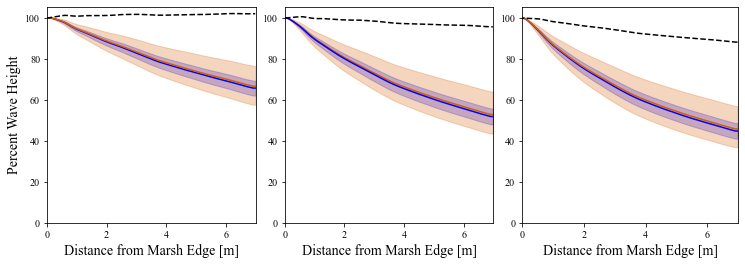

In [27]:
root = pl.Path('/Users/tmiesse/work/FHRL/eeslr/modelling/xbeach/dan_study/new_grid/synthetic')
files = list((root / 'outputs').glob('*.nc'))
plt.rcParams["font.family"] = "Times New Roman"
fig = plt.figure(figsize=(10,3),frameon=True)
#ax1=plt.axes([0,0.,1,1])
ax1,ax2= plt.axes([0,0.,.29,1]),plt.axes([0.33,0.,0.29,1])
ax3 = plt.axes([0.66,0.,0.3,1])  
colors = ['#b45b1f','#0000FF','#edb692']
c2 = ['#1f78b4','#d55e00','#a8d3f0']
i = 4
idx = 116
for f in files:
    xb = nc4.Dataset(f)
    x = xb.variables['globalx'][:,0]-11.7
    if 'nothing' in f.name:
        pass
    elif ('wl2' in f.name.split('_')[0]) & ('hs0.33' in f.name.split('_')[1]):
        if ('ah1.108' in f.name.split('_')[2]) & ('bv0.00502' in f.name.split('_')[3]) & ('nh220.36phrag3.nc' in f.name.split('_')[4]):
            c = colors[0]
            n = r'Phrag min'
            p11 = (xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,idx])*100
            #ax1.plot(x,p1,color=c)
        elif ('ah1.163' in f.name.split('_')[2]) & ('bv0.00514' in f.name.split('_')[3]) & ('nh238.4phrag3.nc' in f.name.split('_')[4]):
            c = colors[1]
            n = r'Phrag ave'
            p21 = (xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,idx])*100

            ax1.plot(x,p21,color=c,label='Phragmites')
        elif ('ah1.218' in f.name.split('_')[2]) & ('bv0.00527' in f.name.split('_')[3]) & ('nh256.4phrag3.nc' in f.name.split('_')[4]):
            c = colors[2]
            n = r'Phrag max'
            p31 = (xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,idx])*100
            #ax1.plot(x,p3,color=c)
        elif ('ah0.6176' in f.name.split('_')[2]) & ('bv0.00284' in f.name.split('_')[3]) & ('nh541.2spart3.nc' in f.name.split('_')[4]):
            c = c2[0]
            n = r'Spart min'
            s11 = (xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,idx])*100
            #ax1.plot(x,s1,color=c)
        elif ('ah0.6569' in f.name.split('_')[2]) & ('bv0.00305' in f.name.split('_')[3]) & ('nh771.4spart3.nc' in f.name.split('_')[4]):
            c = c2[1]
            n = r'Spart ave'
            s21 = (xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,idx])*100
            ax1.plot(x,s21,color=c,label='S. Alterniflora')
        elif ('ah0.6961' in f.name.split('_')[2]) & ('bv0.00327' in f.name.split('_')[3]) & ('nh1001.65spart3.nc' in f.name.split('_')[4]):
            c = c2[2]
            n = r'Spart max'
            s31 = (xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,idx])*100
            #ax1.plot(x,s3,color=c)


    elif ('wl2' in f.name.split('_')[0]) & ('hs0.63' in f.name.split('_')[1]):
        if ('ah1.108' in f.name.split('_')[2]) & ('bv0.00502' in f.name.split('_')[3]) & ('nh220.36phrag3.nc' in f.name.split('_')[4]):
            c = colors[0]
            n = r'Phrag min'
            p12 = (xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,idx])*100
            #ax1.plot(x,p1,color=c)
        elif ('ah1.163' in f.name.split('_')[2]) & ('bv0.00514' in f.name.split('_')[3]) & ('nh238.4phrag3.nc' in f.name.split('_')[4]):
            c = colors[1]
            n = r'Phrag ave'
            p22 = (xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,idx])*100

            ax2.plot(x,p22,color=c,label='Phragmites')
        elif ('ah1.218' in f.name.split('_')[2]) & ('bv0.00527' in f.name.split('_')[3]) & ('nh256.4phrag3.nc' in f.name.split('_')[4]):
            c = colors[2]
            n = r'Phrag max'
            p32 = (xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,idx])*100
            #ax1.plot(x,p3,color=c)
        elif ('ah0.6176' in f.name.split('_')[2]) & ('bv0.00284' in f.name.split('_')[3]) & ('nh541.2spart3.nc' in f.name.split('_')[4]):
            c = c2[0]
            n = r'Spart min'
            s12 = (xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,idx])*100
            #ax1.plot(x,s1,color=c)
        elif ('ah0.6569' in f.name.split('_')[2]) & ('bv0.00305' in f.name.split('_')[3]) & ('nh771.4spart3.nc' in f.name.split('_')[4]):
            c = c2[1]
            n = r'Spart ave'
            s22 = (xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,idx])*100
            ax2.plot(x,s22,color=c,label='S. Alterniflora')
        elif ('ah0.6961' in f.name.split('_')[2]) & ('bv0.00327' in f.name.split('_')[3]) & ('nh1001.65spart3.nc' in f.name.split('_')[4]):
            c = c2[2]
            n = r'Spart max'
            s32 = (xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,idx])*100
            #ax1.plot(x,s3,color=c)

    elif ('wl2' in f.name.split('_')[0]) & ('hs1.03' in f.name.split('_')[1]) :
        if ('ah1.108' in f.name.split('_')[2]) & ('bv0.00502' in f.name.split('_')[3]) & ('nh220.36phrag3.nc' in f.name.split('_')[4]):
            c = colors[0]
            n = r'Phrag min'
            p13 = (xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,idx])*100
            #ax1.plot(x,p1,color=c)
        elif ('ah1.163' in f.name.split('_')[2]) & ('bv0.00514' in f.name.split('_')[3]) & ('nh238.4phrag3.nc' in f.name.split('_')[4]):
            c = colors[1]
            n = r'Phrag ave'
            p23 = (xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,idx])*100

            ax3.plot(x,p23,color=c,label='Phragmites')
        elif ('ah1.218' in f.name.split('_')[2]) & ('bv0.00527' in f.name.split('_')[3]) & ('nh256.4phrag3.nc' in f.name.split('_')[4]):
            c = colors[2]
            n = r'Phrag max'
            p33 = (xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,idx])*100
            #ax1.plot(x,p3,color=c)
        elif ('ah0.6176' in f.name.split('_')[2]) & ('bv0.00284' in f.name.split('_')[3]) & ('nh541.2spart3.nc' in f.name.split('_')[4]):
            c = c2[0]
            n = r'Spart min'
            s13= (xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,idx])*100
            #ax1.plot(x,s1,color=c)
        elif ('ah0.6569' in f.name.split('_')[2]) & ('bv0.00305' in f.name.split('_')[3]) & ('nh771.4spart3.nc' in f.name.split('_')[4]):
            c = c2[1]
            n = r'Spart ave'
            s23 = (xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,idx])*100
            ax3.plot(x,s23,color=c,label='S. Alterniflora')
        elif ('ah0.6961' in f.name.split('_')[2]) & ('bv0.00327' in f.name.split('_')[3]) & ('nh1001.65spart3.nc' in f.name.split('_')[4]):
            c = c2[2]
            n = r'Spart max'
            s33 = (xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,idx])*100
            #ax1.plot(x,s3,color=c)
        
xb =  nc4.Dataset('/Users/tmiesse/work/FHRL/eeslr/modelling/xbeach/dan_study/new_grid/synthetic/outputs/hs03nothing3.nc')
n2 = (xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,idx])*100
ax1.plot(x,n2,'--k',label='No Vege')
ax1.fill_between(x,p31,p11,color='#0000FF',alpha=0.25,zorder=1)
ax1.fill_between(x,s31,s11,color='#d55e00',alpha=0.25,zorder=1)

xb =  nc4.Dataset('/Users/tmiesse/work/FHRL/eeslr/modelling/xbeach/dan_study/new_grid/synthetic/outputs/hs06nothing3.nc')
n2 = (xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,idx])*100
ax2.plot(x,n2,'--k',label='No Vege')
ax2.fill_between(x,p32,p12,color='#0000FF',alpha=0.25,zorder=1)
ax2.fill_between(x,s32,s12,color='#d55e00',alpha=0.25,zorder=1)

xb =  nc4.Dataset('/Users/tmiesse/work/FHRL/eeslr/modelling/xbeach/dan_study/new_grid/synthetic/outputs/hs1nothing3.nc')
n2 = (xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,idx])*100
ax3.plot(x,n2,'--k',label='No Vege')
ax3.fill_between(x,p33,p13,color='#0000FF',alpha=0.25,zorder=1)
ax3.fill_between(x,s33,s13,color='#d55e00',alpha=0.25,zorder=1)   
#ax1.grid(),ax2.grid(),ax3.grid(),
ax1.set_ylim([0,105.5]),ax2.set_ylim([0,105.5]),ax3.set_ylim([0,105.5]),
#ax2.yticks([]),ax3.yticks([])
#ax1.set_title('Wave Height 0.3m'),ax2.set_title('Wave Height 0.6m'),ax3.set_title('Wave Height 1m')
ax1.set_xlim([0,7]),ax2.set_xlim([0,7.]),ax3.set_xlim([0,7.])

ax1.set_ylabel('Percent Wave Height',fontsize=14)
ax1.set_xlabel('Distance from Marsh Edge [m]',fontsize=14)
ax2.set_xlabel('Distance from Marsh Edge [m]',fontsize=14)
ax3.set_xlabel('Distance from Marsh Edge [m]',fontsize=14)
x_ticks = np.arange(0, 8, 2)
ax3.set_xticks(x_ticks)
#ax1.legend(loc='lower left', ncol=1,frameon=True,fontsize=12)
plt.savefig('wave_event3_update.png',dpi=600,bbox_inches = 'tight', pad_inches = 0.01)
plt.show()


#### Initialize Paths

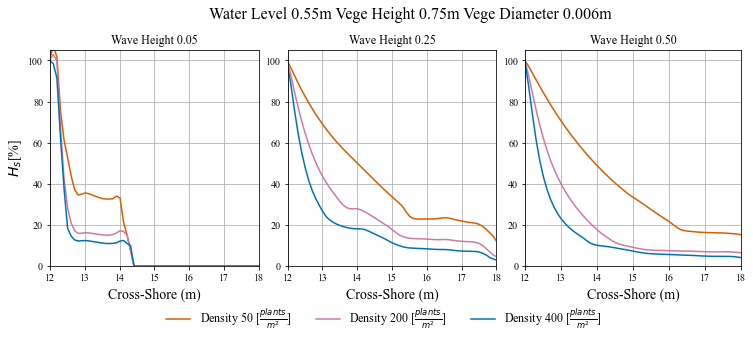

In [117]:
root = pl.Path('/Users/tmiesse/work/FHRL/eeslr/modelling/xbeach/dan_study/sensitivity')
files = list((root / 'outputs').glob('*.nc'))
plt.rcParams["font.family"] = "Times New Roman"
fig = plt.figure(figsize=(10,3),frameon=True)
ax1,ax2= plt.axes([0,0.,.29,1]),plt.axes([0.33,0.,0.29,1])
ax3 = plt.axes([0.66,0.,0.3,1])  
colors = ['#d55e00','#cc79a7','#0072b2','#009e73']
i = 4
for f in files:
    if ('wl0.55' in f.name.split('_')[0]) & ('bv0.01' in f.name.split('_')[3]) & ('ah0.75' in f.name.split('_')[2]):
        if ('nh50.nc' in f.name.split('_')[4]):
            c = colors[0]
            n = r'Density 50 [$\frac{plants}{m^{2}}$]'
        elif ('nh200.nc' in f.name.split('_')[4]):
            c = colors[1]
            n = r'Density 200 [$\frac{plants}{m^{2}}$]'
        elif ('nh400.nc' in f.name.split('_')[4]):
            c = colors[2]
            n = r'Density 400 [$\frac{plants}{m^{2}}$]'
        xb = nc4.Dataset(f)
        if ('hs0.05' in f.name.split('_')[1]):
            ax1.plot(xb.variables['globalx'][:,0],(xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,119])*100,color=c,label=n)
            ax1.set_title('Wave Height 0.05')
            
        elif ('hs0.25' in f.name.split('_')[1]):

            ax2.plot(xb.variables['globalx'][:,0],(xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,119])*100,color=c)
            ax2.set_title('Wave Height 0.25')
            
        elif ('hs0.5' in f.name.split('_')[1]):
            ax3.plot(xb.variables['globalx'][:,0],(xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,119])*100,color=c)
            ax3.set_title('Wave Height 0.50')
            
ax1.grid(),ax2.grid(),ax3.grid(),ax1.set_ylim([0,105]),
ax2.set_ylim([0,105]),ax3.set_ylim([0,105])
ax1.set_xlim([12,18.]),ax2.set_xlim([12,18.]),ax3.set_xlim([12,18.])


ax1.set_ylabel('$H_{s}$[%]',fontsize=14)
ax1.set_xlabel('Cross-Shore (m)',fontsize=14),ax2.set_xlabel('Cross-Shore (m)',fontsize=14),ax3.set_xlabel('Cross-Shore (m)',fontsize=14)
plt.suptitle('Water Level 0.55m Vege Height 0.75m Vege Diameter 0.006m',x=0.5,y=1.2,fontsize=16)

ax1.legend(loc='lower center', bbox_to_anchor=(1.6, -0.35),ncol=3,frameon=False,fontsize=12)
plt.savefig('wave_density_varying_wl055.png',dpi=600,bbox_inches = 'tight', pad_inches = 0.01)
plt.show()



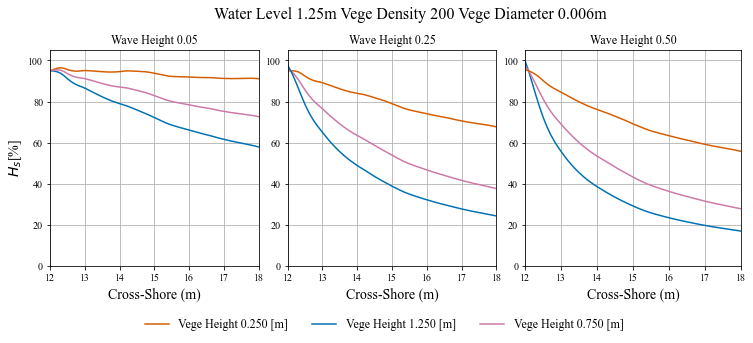

In [156]:
root = pl.Path('/Users/tmiesse/work/FHRL/eeslr/modelling/xbeach/dan_study/sensitivity')
files = list((root / 'outputs').glob('*.nc'))
plt.rcParams["font.family"] = "Times New Roman"
fig = plt.figure(figsize=(10,3),frameon=True)
ax1,ax2= plt.axes([0,0.,.29,1]),plt.axes([0.33,0.,0.29,1])
ax3 = plt.axes([0.66,0.,0.3,1])  
colors = ['#d55e00','#cc79a7','#0072b2','#009e73']
i = 1
for f in files:
    if ('wl1.25' in f.name.split('_')[0]) & ('bv0.01' in f.name.split('_')[3]) & ('ah1.25' in f.name.split('_')[2]):
        if ('nh50.nc' in f.name.split('_')[4]):
            c = colors[0]
            n = r'Vege Height 0.250 [m]'
            xb = nc4.Dataset(f)
        elif ('nh200.nc' in f.name.split('_')[4]):
            c = colors[1]
            n = r'Vege Height 0.750 [m]'
            xb = nc4.Dataset(f)
        elif ('nh400.nc' in f.name.split('_')[4]):
            c = colors[2]
            n = r'Vege Height 1.250 [m]'
            xb = nc4.Dataset(f)
        
        if ('hs0.05' in f.name.split('_')[1]):
            ax1.plot(xb.variables['globalx'][:,0],((xb.variables['H_mean'][i,0,:]*0.95)/(xb.variables['H_mean'][i,:,119]))*100,color=c,label=n)
            ax1.set_title('Wave Height 0.05')   
        elif ('hs0.25' in f.name.split('_')[1]):
            ax2.plot(xb.variables['globalx'][:,0],((xb.variables['H_mean'][i,0,:]*0.95)/xb.variables['H_mean'][i,:,120])*100,color=c)
            ax2.set_title('Wave Height 0.25')
        elif ('hs0.5' in f.name.split('_')[1]):
            ax3.plot(xb.variables['globalx'][:,0],((xb.variables['H_mean'][i,0,:]*0.95)/xb.variables['H_mean'][i,:,120])*100,color=c)
            ax3.set_title('Wave Height 0.50')
            
ax1.grid(),ax2.grid(),ax3.grid(),ax1.set_ylim([0,105]),
ax2.set_ylim([0,105]),ax3.set_ylim([0,105])
ax1.set_xlim([12,18.]),ax2.set_xlim([12,18.]),ax3.set_xlim([12,18.])


ax1.set_ylabel('$H_{s}$[%]',fontsize=14)
ax1.set_xlabel('Cross-Shore (m)',fontsize=14),ax2.set_xlabel('Cross-Shore (m)',fontsize=14),ax3.set_xlabel('Cross-Shore (m)',fontsize=14)
plt.suptitle('Water Level 1.25m Vege Density 200 Vege Diameter 0.006m',x=0.5,y=1.2,fontsize=16)

ax1.legend(loc='lower center', bbox_to_anchor=(1.6, -0.35),ncol=3,frameon=False,fontsize=12)
plt.savefig('wave_height_varying_wl125_test.png',dpi=600,bbox_inches = 'tight', pad_inches = 0.01)
plt.show()



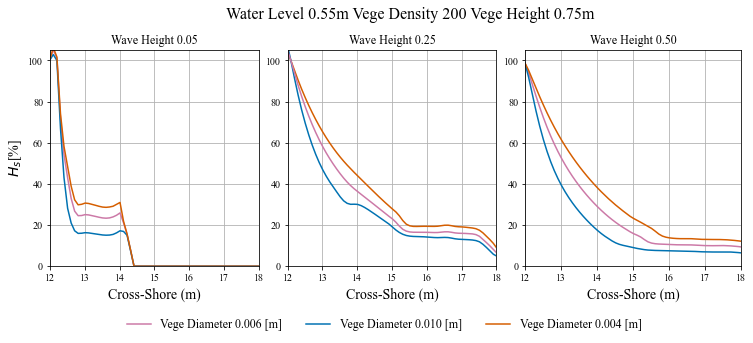

In [113]:
root = pl.Path('/Users/tmiesse/work/FHRL/eeslr/modelling/xbeach/dan_study/sensitivity')
files = list((root / 'outputs').glob('*.nc'))
plt.rcParams["font.family"] = "Times New Roman"
fig = plt.figure(figsize=(10,3),frameon=True)
ax1,ax2= plt.axes([0,0.,.29,1]),plt.axes([0.33,0.,0.29,1])
ax3 = plt.axes([0.66,0.,0.3,1])  
colors = ['#d55e00','#cc79a7','#0072b2','#009e73']
i = 4
for f in files:
    if ('wl0.55' in f.name.split('_')[0]) & ('ah0.75' in f.name.split('_')[2]) & ('nh200.nc' in f.name.split('_')[4]):
        if ('bv0.004' in f.name.split('_')[3]):
            c = colors[0]
            n = r'Vege Diameter 0.004 [m]'
        elif ('bv0.006' in f.name.split('_')[3]):
            c = colors[1]
            n =r'Vege Diameter 0.006 [m]'
        elif ('bv0.01' in f.name.split('_')[3]):
            c = colors[2]
            n = r'Vege Diameter 0.010 [m]'
        xb = nc4.Dataset(f)
        if ('hs0.05' in f.name.split('_')[1]):
            ax1.plot(xb.variables['globalx'][:,0],(xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,119])*100,color=c,label=n)
            ax1.set_title('Wave Height 0.05')
            
        elif ('hs0.25' in f.name.split('_')[1]):

            ax2.plot(xb.variables['globalx'][:,0],(xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,120])*100,color=c)
            ax2.set_title('Wave Height 0.25')
            
        elif ('hs0.5' in f.name.split('_')[1]):
            ax3.plot(xb.variables['globalx'][:,0],(xb.variables['H_mean'][i,0,:]/xb.variables['H_mean'][i,:,118])*100,color=c)
            ax3.set_title('Wave Height 0.50')
            
ax1.grid(),ax2.grid(),ax3.grid(),ax1.set_ylim([0,105]),
ax2.set_ylim([0,105]),ax3.set_ylim([0,105])
ax1.set_xlim([12,18.]),ax2.set_xlim([12,18.]),ax3.set_xlim([12,18.])


ax1.set_ylabel('$H_{s}$[%]',fontsize=14)
ax1.set_xlabel('Cross-Shore (m)',fontsize=14),ax2.set_xlabel('Cross-Shore (m)',fontsize=14),ax3.set_xlabel('Cross-Shore (m)',fontsize=14)
plt.suptitle('Water Level 0.55m Vege Density 200 Vege Height 0.75m',x=0.5,y=1.2,fontsize=16)

ax1.legend(loc='lower center', bbox_to_anchor=(1.6, -0.35),ncol=3,frameon=False,fontsize=12)
plt.savefig('wave_diameter_varying_wl055.png',dpi=600,bbox_inches = 'tight', pad_inches = 0.01)
plt.show()



In [3]:
root = pl.Path('/Users/tmiesse/work/FHRL/eeslr/modelling/xbeach/dan_study/new_grid/response2reviews/review1')
xb = nc4.Dataset(root/'event.nc')
start = '2020-08-02 18:00:00.000'
freq = '20min'
timedelta = pd.date_range(start=start,periods=int(len(xb.variables['H_mean'][:,0])),freq=freq)

In [9]:
import os
import shutil

In [10]:
root = pl.Path('/Users/tmiesse/work/FHRL/eeslr/modelling/xbeach/dan_study/new_grid/synthetic')


templates = root / 'templates'
wl = [3]
hs = [0.33,0.63,1.03]
ah1 = [1.108,1.163,1.218]
bv1 = [0.00502,0.00514,0.00527]
nh1 = [220.36, 238.4, 256.4]
ah2 = [0.6176,0.6569,0.6961]
nh2 = [541.2,771.4,1001.65]
bv2 = [0.00284,0.00305,0.00327]

In [13]:
nh = nh2
bv = bv2
ah = ah2
names = []
for a in range(len(wl)):
    for b in range(len(hs)):
        for c in range(len(ah)):
            for d in range(len(bv)):
                for e in range(len(nh)):
                    name = f'wl{wl[a]}_hs{hs[b]}_ah{ah[c]}_bv{bv[d]}_nh{nh[e]}'
                    path = root / 'spart_scen4'
                    if path.exists():
                        pass
                    else:
                        os.mkdir(path)
                    path = path / name
                    names.append(path)
                    os.mkdir(path)
                    for file in list((root / 'defaults').glob('*')):
                        shutil.copy2(file, path / file.name)
                    for file in list((root / 'templates').glob('*')):
                        if '.DS_Store' in file.name:
                            pass
                        else:
                            with open(file,'r') as fin:
                                lines = fin.readlines()
                                with open(path / file.name,'w') as fout:
                                    for line in lines:
                                        if '{zs}' in line:
                                            line = f'zs0          = {wl[a]} \n'
                                        elif '{hs}' in line:
                                            line = f'Hm0           = {hs[b]} \n'
                                        elif '{ah}' in line:
                                            line = f'ah = {ah[c]} \n'
                                        elif '{bv}' in line:
                                            line = f'bv = {bv[d]} \n'
                                        elif '{nh}' in line:
                                            line = f'N = {nh[e]} \n'
                                        fout.write(line)
                                fout.close()
                                

In [14]:
text = '#!bin/bash \n' \
'# Initialize Paths for the sources used to compile \n' \
'NFDIR=/Users/tmiesse/work/libraries/source_compiles/nf_build \n' \
'MDIR=/Users/tmiesse/work/libraries/source_compiles/mpi_build \n' \
'XPATH=/Users/tmiesse/work/libraries/xbeach/exe/ \n' \
'NCDIR=/Users/tmiesse/work/libraries/source_compiles/nc_build \n' \
'H5DIR=/Users/tmiesse/work/libraries/source_compiles/hdf_build \n' \
'# Add sources to the computer paths to use executables \n' \
'export CC=icc \n' \
'export CXX=icpc \n'\
"export CFLAGS='-O3 -xHost -ip -no-prec-div' \n"\
"export CXXFLAGS='-O3 -xHost -ip -no-prec-div' \n" \
'export F77=ifort \n' \
"export FFLAGS='-O3 -xHost -ip -no-prec-div -mdynamic-no-pic' \n"\
'export FC=ifort \n'\
'export F90=ifort \n'\
'export PATH=$MDIR/bin:$PATH \n'
with open(root / 'run_xbeach.sh','w') as fin:
    fin.write(text)
    for n in names:
        fin.write('cd '+str(n) + '\n')
        fin.write('mpirun -np 4 xbeach \n')
    fin.close()

In [32]:
new = []
for n in names:
    new.append(n.name)

#### Initialize Variables

In [4]:
def utm2geo(x,y,code:int=18,zone:str='northern'):
    limits = x.shape
    x2,y2 = np.ma.array(np.zeros(x.shape)),np.ma.array(np.zeros(y.shape))
    for i in range(0,limits[0]):
        for ii in range(0,limits[1]):
            coord = utm.to_latlon(x[i,ii],y[i,ii],code,zone)
            x2[i,ii] = coord[1] 
            y2[i,ii] = coord[0]
    return x2,y2

In [6]:
import sys
def printProgressBar(i,max,postText):
    n_bar =10 #size of progress bar
    j= i/max
    sys.stdout.write('\r')
    sys.stdout.write(f"[{'=' * int(n_bar * j):{n_bar}s}] {int(100 * j)}%  {postText}")
    sys.stdout.flush()

In [7]:
#x,y = utm2geo(xb.variables['globalx'][:,:],xb.variables['globaly'][:,:])
z = xb.variables['zb'][:,:,:]
t = xb.variables['meantime'][:]
zs = xb.variables['zs'][:,:,:]
h = xb.variables['H_mean'][:,:,:]
#u = xb.variables['u'][:]
#v = xb.variables['v'][:]
x,y = xb.variables['globalx'][:,:].data,xb.variables['globaly'][:,:].data
np.max(h)

0.0845853743207905

In [4]:
es = [36.648254,36.673781, -75.952807, -75.932359]

/Users/tmiesse/miniconda3/envs/geospatial/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/Users/tmiesse/miniconda3/envs/geospatial/lib/python3.7/site-packages/pyproj/crs/crs.py:294: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(" ".join((projstring, projkwargs)))


http://server.arcgisonline.com/ArcGIS/rest/services/World_Topo_Map/MapServer/export?bbox=-75.994174,36.64003200090379,-75.893231,36.730755000904644&bboxSR=4269&imageSR=4269&size=480,431&dpi=96&format=png32&transparent=true&f=image


/Users/tmiesse/miniconda3/envs/geospatial/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/Users/tmiesse/miniconda3/envs/geospatial/lib/python3.7/site-packages/pyproj/crs/crs.py:294: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(" ".join((projstring, projkwargs)))


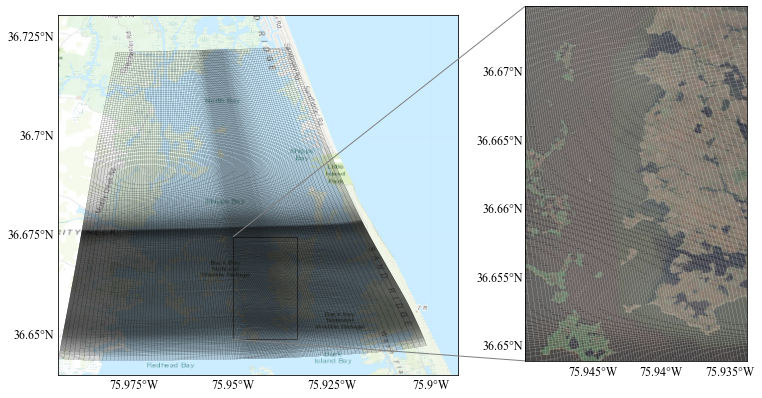

In [10]:
plt.rcParams["font.family"] = "Times New Roman"
fig = plt.figure(figsize=(8,5))
ax = fig.add_axes([0,0.,1,1])
ax0= fig.add_axes([0.405,0.,0.595,1],xticks=[],yticks=[],frame_on=False,facecolor=None)



# ----------------------------- US -------------------------------------------
lat1,lat2 =36.640032,36.730755
lon1,lon2 =-75.994174, -75.893231
m = Basemap(llcrnrlat=lat1,urcrnrlat=lat2,
            llcrnrlon=lon1,urcrnrlon=lon2,resolution='h', epsg = 4269,ax=ax)
#Canvas/

m.arcgisimage(service='World_Topo_Map', xpixels=480,verbose=True,ax=ax)
#m.bluemarble()
m.drawparallels(np.arange(0, 100, 0.025), linewidth=0.01,labels=[1,0,0,0], color='#595959',fontsize=12)
m.drawmeridians(np.arange(0, 360, 0.025), linewidth=0.01, labels=[0,0,0,1],zorder=3,fontsize=12)
#ax.triplot(xx,yy,triang.triangles,'.-',color='k',linewidth=0.5,markersize=1)
ax.plot(x,y,'k',linewidth=0.15)
ax.plot(x.transpose(),y.transpose(),'k',linewidth=0.15)
# -----------------------Chesapeake Bay-----------------------------------
lat1c,lat2c=36.648971,36.674825
lon1c,lon2c=  -75.949960, -75.933789
ax_cb = zoomed_inset_axes(ax0,40, loc=4,bbox_to_anchor=(1.1, 0., 0.5, 0.45),
                          bbox_transform=ax0.transAxes)
mc = Basemap(llcrnrlat=lat1c,urcrnrlat=lat2c,
            llcrnrlon=lon1c,urcrnrlon=lon2c,resolution='l', epsg = 4269,ax=ax_cb)
mc.arcgisimage(service='World_Imagery', xpixels=720, verbose= False,ax=ax_cb)
ax_cb.plot(x,y,'w',linewidth=0.15)
ax_cb.plot(x.transpose(),y.transpose(),'w',linewidth=0.15)
#ax_cb.triplot(xx,yy,triang.triangles,'.-',color='k',linewidth=0.01,markersize=0.25)

mark_inset(ax, ax_cb, loc1=2, loc2=3, fc="none", ec="0.5",color='w')

mc.drawparallels(np.arange(0, 100, 0.005), linewidth=0.01,labels=[1,0,0,0], color='#595959',fontsize=12)
mc.drawmeridians(np.arange(0, 360, 0.005), linewidth=0.01, labels=[0,0,0,1],zorder=3,fontsize=12)
'''
# ---------------------------- Eastern Shore -----------------------------------
ax_es = zoomed_inset_axes(ax_cb,4, loc=4,bbox_to_anchor=(.1, 0., 0.25, 0.45),
                          bbox_transform=ax0.transAxes)
m2 = Basemap(llcrnrlat=es[0],urcrnrlat=es[1],
            llcrnrlon=es[2],urcrnrlon=es[3], ax=ax_es)

m2.arcgisimage(service='World_Imagery',ax=ax_es,xpixels=840)
#ax_es.plot(x,y,'k',linewidth=0.1)
#ax_es.plot(x.transpose(),y.transpose(),'k',linewidth=0.1)

mark_inset(ax_cb, ax_es, loc1=1, loc2=2, fc="none", ec="0.5",color='k')
m2.drawparallels(np.arange(0, 100, 0.005), linewidth=0.01,labels=[0,1,0,0], color='#595959',fontsize=12)
m2.drawmeridians(np.arange(0, 360, 0.005), linewidth=0.01, labels=[0,0,0,1],zorder=3,fontsize=12)

# ---------------------------- Magothy Bay -----------------------------------
ax_mgb = zoomed_inset_axes(ax_cb,220, loc=2,bbox_to_anchor=(.66, 0.405, 0.25, 0.45),
                           bbox_transform=ax0.transAxes)
m3 = Basemap(llcrnrlat=mgb[0],urcrnrlat=mgb[1],
            llcrnrlon=mgb[2],urcrnrlon=mgb[3], ax=ax_mgb)
m3.arcgisimage(service='World_Imagery',ax=ax_mgb,xpixels=840)
ax_mgb.triplot(xx,yy,triang.triangles,'.-',color='k',linewidth=0.25,markersize=0.75)
ax_mgb.set_title('Magothy Bay Natural Area Preserve, Virginia',fontsize=18)
mark_inset(ax_cb, ax_mgb, loc1=2, loc2=3, fc="none", ec="0.5",color='k')
m3.drawparallels(np.arange(0, 100, 0.005), linewidth=0.01,labels=[0,1,0,0], color='#595959',fontsize=12)
m3.drawmeridians(np.arange(0, 360, 0.005), linewidth=0.01, labels=[0,0,0,1],zorder=3,fontsize=12)
'''
plt.savefig(root / 'map.png',dpi=240,bbox_inches = 'tight', pad_inches = 0.1,transparent=True)
plt.show()

#### Show grid and bathy of Study Site

In [9]:
root2 = pl.Path('/Users/tmiesse/work/dewberry/vb_terrace/modeling/adcirc_swan/subdomain')
nc_file = nc4.Dataset(root2 / 'swan_HS.63.nc')
start = '20210525 00:30:00'
freq = '60min'
timedelta = pd.date_range(start=start,periods=int(len(nc_file.variables['swan_HS'][:,0])),freq=freq)
xa,ya = nc_file.variables['x'][:],nc_file.variables['y'][:]
vege = np.loadtxt(root2 / 'vege1.grd')

In [4]:
obfile = pl.Path('/Users/tmiesse/work/FHRL/eeslr/field/rbr/franklin') # 
file = pd.read_csv(obfile / '203867_20200819_1107.csv')
file2=pd.read_csv(obfile / '204010_20200819_1137.csv')
file3=pd.read_csv(obfile / '204012_20200819_1117.csv')
file4=pd.read_csv(obfile / '204011_20200819_1126.csv')
timedelta2 = pd.date_range(start=file['Time'][0],periods=len(file),freq='5min')
obs_dist = [0,10.8,15.06,18]

In [5]:
obs_hs  = [0.0827,0.0354,0.0108,0.0064]
obs_hs2 = [0.2257,0.1787,0.0444,0.0277]
obs_hs3 = [0.2257,0.1787,0.0644,0.0577]

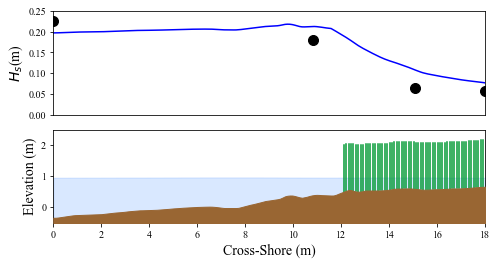

In [8]:
plt.rcParams["font.family"] = "Times New Roman"
fig = plt.figure(figsize=(6,3))
ax1 = plt.axes([0,.5,1,.48])
ax2 = plt.axes([0,0,1,.43])
ii = 23
time = 4
#for i in range(0,len(eqn)):
#xb = nc4.Dataset(str(root  / eqn[i]))
#xb2 = nc4.Dataset(str(root / 'validation' / eqn[i] / 'xboutput.nc'))
# xbeach output variables
z = xb.variables['zb_mean'][0,:][0] # model elevation
t = xb.variables['meantime'][:] # model time 
h = xb.variables['H_mean'][:]#*1.3 # model wave height
zs = xb.variables['zs'][:] # model water level
x = xb.variables['globalx'][:,:]
hn=h[time,:,:]


# finds vege based on elevation
vege = []
for ii in range(0,len(z[:])):
    if z[ii]>0.48:
        vege.append(1.5)
    else:
        vege.append(0)

ax1.plot(x[:,0],hn[:][0],color='b')
ax1.plot(obs_dist[0],obs_hs3[0],color='k',marker='.',markersize=20)
ax1.plot(obs_dist[1],obs_hs3[1],color='k',marker='.',markersize=20)
ax1.plot(obs_dist[2],obs_hs3[2],color='k',marker='.',markersize=20)
ax1.plot(obs_dist[3],obs_hs3[3],color='k',marker='.',markersize=20)
# plotting vegetation
for ii in range(0,len(vege)):
    vege2 = ax2.plot((x[ii],x[ii]),(z[ii],z[ii]+vege[ii]),color='#009933')
ax2.fill_between(x[:,0],zs[time,0,:],-3,color='#0066ff',alpha=0.15)
ax2.fill_between(x[:,0],z[:],-3,color='#996633',zorder=3)
ax1.set_ylim([-.0,0.25])
ax2.set_ylim([-.50,2.5])
ax1.set_xlim([0,18.])
ax2.set_xlim([0,18.])
ax1.set_xticks([])
#ax2.plot(x[0,:],zs[20,:,:][0],'b')
ax1.set_ylabel('$H_{s}$(m)',fontsize=14)
ax2.set_ylabel('Elevation (m)',fontsize=14)
ax2.set_xlabel('Cross-Shore (m)',fontsize=14)
#ax1.set_title('Wave Attenuation',fontsize=14)
#plt.box(on=None)
#plt.savefig('wave_att_phrag_vary.png',dpi=600,bbox_inches = 'tight', pad_inches = 0.01)
plt.show()


In [3]:
root = pl.Path('/Users/tmiesse/work/FHRL/eeslr/modelling/xbeach/dan_study/new_grid/response2reviews/review1')
xb = nc4.Dataset(root/'event1_response.nc')
event1 = [0.2101,0.169,0.0723,0.0667]
event2 = [0.2336,0.1487,0.0254,0.001]
event3 = [0.2707,0.24,0.059,0.0466]
event4 = [0.2017,0.165,0.0165,0.0015]
event5 = [0.2339,0.1905,0.0223,0.0113]
obs_dist = [0,10.8,15.06,18]

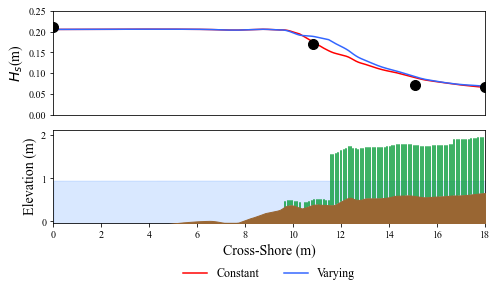

In [13]:
root2 = pl.Path('/Users/tmiesse/work/FHRL/eeslr/modelling/xbeach/dan_study/new_grid/experimental_setups/outputs')
xb2 = nc4.Dataset(root2/'event1v3.nc')


plt.rcParams["font.family"] = "Times New Roman"
fig = plt.figure(figsize=(6,3))
ax1 = plt.axes([0,.5,1,.48])
ax2 = plt.axes([0,0,1,.43])
ii = 23
time = 2
x = xb.variables['globalx'][:,:]
# xbeach output variables
z2 = xb2.variables['zb_mean'][0,:][0] # model elevation
t2 = xb2.variables['meantime'][:] # model time 
h2 = xb2.variables['H_mean'][:] # model wave height
zs2 = xb2.variables['zs'][:] # model water level
x2 = xb2.variables['globalx'][:,:]
h = xb.variables['H_mean'][:]
# finds vege based on elevation
vege = []
for ii in range(0,len(z2[:])):
    if z2[ii]>0.31:
        if 9.6<x2[ii]<11.5:
            vege.append(0.104)
        elif 11.5<x2[ii]<16.7:
            vege.append(1.165)
        elif 16.7<x2[ii]:
            vege.append(1.276)
    else:
        vege.append(0)
ax1.plot(x[:,0],h[time,0,:],color='#ff0000',label='Constant')
ax1.plot(x2[:,0],h2[time,0,:],color='#3366ff',label='Varying')

ax1.plot(obs_dist[0],event1[0],color='k',marker='.',markersize=20)
ax1.plot(obs_dist[1],event1[1],color='k',marker='.',markersize=20)
ax1.plot(obs_dist[2],event1[2],color='k',marker='.',markersize=20)
ax1.plot(obs_dist[3],event1[3],color='k',marker='.',markersize=20)

# plotting vegetation
for ii in range(0,len(vege)):
    vege2 = ax2.plot((x2[ii],x2[ii]),(z2[ii],z2[ii]+vege[ii]),color='#009933')
ax2.fill_between(x2[:,0],zs2[time,0,:],-3,color='#0066ff',alpha=0.15)
ax2.fill_between(x2[:,0],z2[:],-3,color='#996633',zorder=3)
ax1.set_ylim([-.0,0.25]),ax2.set_ylim([-.0250,2.125])
ax1.set_xlim([0,18.]),ax2.set_xlim([0,18.])
ax1.set_xticks([])
ax1.set_ylabel('$H_{s}$(m)',fontsize=14),ax2.set_ylabel('Elevation (m)',fontsize=14)
ax2.set_xlabel('Cross-Shore (m)',fontsize=14)
#ax1.set_title('Franklin Point: Event 4')
ax1.legend(loc='lower center', bbox_to_anchor=(0.5, -1.7),ncol=3,frameon=False,fontsize=12)

plt.savefig('resp2rev_c1v3.png',dpi=600,bbox_inches = 'tight', pad_inches = 0.01)
plt.show()


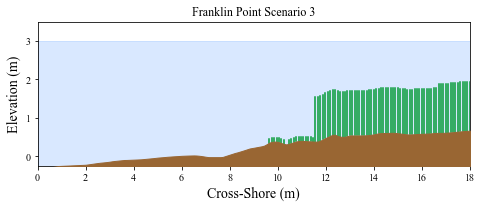

In [18]:
#root = pl.Path('/Users/tmiesse/work/FHRL/eeslr/modelling/xbeach/dan_study/new_grid/synthetic')
#files = list((root / 'outputs').glob('*.nc'))
xb = nc4.Dataset('/Users/tmiesse/work/FHRL/eeslr/modelling/xbeach/dan_study/new_grid/synthetic/outputs/wl3_hs1.03_ah1.218_bv0.00527_nh256.4phrag4.nc')
plt.rcParams["font.family"] = "Times New Roman"
start = '2020-08-02 18:00:00.000'
freq = '20min'
timedelta = pd.date_range(start=start,periods=int(len(xb.variables['H_mean'][:,0])),freq=freq)

plt.rcParams["font.family"] = "Times New Roman"
fig = plt.figure(figsize=(6,2))
ax1 = plt.axes([0,0,1,1])

ii = 23
time = 0
# xbeach output variables
z2 = xb.variables['zb_mean'][0,:][0] # model elevation
t2 = xb.variables['meantime'][:] # model time 
h2 = xb.variables['H_mean'][:] # model wave height
zs2 = xb.variables['zs'][:] # model water level
x2 = xb.variables['globalx'][:,:]

# finds vege based on elevation
vege = []
for ii in range(0,len(z2[:])):
    if z2[ii]>0.31:
        if 9.6<x2[ii]<11.5:
            vege.append(0.104)
        elif 11.5<x2[ii]<16.7:
            vege.append(1.165)
        elif 16.7<x2[ii]:
            vege.append(1.276)
    else:
        vege.append(0)

# plotting vegetation
for ii in range(0,len(vege)):
    vege2 = ax1.plot((x2[ii],x2[ii]),(z2[ii],z2[ii]+vege[ii]),color='#009933')
ax1.fill_between(x2[:,0],zs2[time,0,:],-3,color='#0066ff',alpha=0.15)
ax1.fill_between(x2[:,0],z2[:],-3,color='#996633',zorder=3)
ax1.set_ylim([-.250,3.5])#,ax2.set_ylim([-.50,2.5])
ax1.set_xlim([0,18.])#,ax2.set_xlim([0,18.])
ax1.set_ylabel('Elevation (m)',fontsize=14)
ax1.set_xlabel('Cross-Shore (m)',fontsize=14)
ax1.set_title('Franklin Point Scenario 3')
plt.savefig('cross_x_scen3.png',dpi=600,bbox_inches = 'tight', pad_inches = 0.01)
plt.show()


In [11]:
zs[time,:,100]-zs[time,:,101]

masked_array(data=[-0.00085096],
             mask=False,
       fill_value=1e+20)

In [50]:
'nh50.nc' in f.name.split('_')[4]

True

In [46]:
f

PosixPath('/Users/tmiesse/work/FHRL/eeslr/modelling/xbeach/dan_study/sensitivity/outputs/wl0.55_hs0.05_ah1.25_bv0.01_nh50.nc')

In [49]:
f.name.split('_')[4]

'nh50.nc'

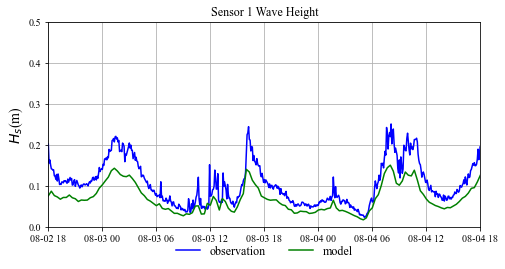

In [154]:
fig = plt.figure(figsize=(6,3))
ax = plt.axes([0,0,1,.95])
plt.rcParams["font.family"] = "Times New Roman"

ax.plot(pd.to_datetime(file['Time']),file['Significant wave height'],'b',label='observation')
ax.plot(timedelta[:],h[:145,0,1],'g',label='model')
#ax.set_title('Storm 2021 Beggar Bridge',fontsize=14),ax.set_ylabel(r'Water Surface Ele [m at NAVD88]',fontsize=12)
ax.set_ylim([-0.,.5])
ax.set_ylabel('$H_{s}$(m)',fontsize=14)
ax.set_xlim([pd.to_datetime('2020-08-02 18:00:00'),pd.to_datetime('2020-08-04 18:00:00')])
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.2),ncol=2,frameon=False,fontsize=12)
ax.grid(True)
ax.set_title('Sensor 1 Wave Height')
#plt.savefig(root /'xb_water.png',dpi=480,bbox_inches = 'tight', pad_inches = 0.1)
plt.savefig('hs_dt_s1_mean.png',dpi=600,bbox_inches = 'tight', pad_inches = 0.01)
plt.show()

In [13]:
# landcover
file = gpd.read_file('/Users/tmiesse/Downloads/nlcd_2019_land_cover_l48_20210604/herb_wetland3.shp')
vege = np.zeros(x.shape)
count = 0
for geo in file.geometry:
    #if count > 89:
    for i in range(0,x.shape[0]):
        #for ii in range(0,x.shape[1]):
        #try:
        for ii in range(0,x.shape[1]):
            #pts = gpd.GeoDataFrame(geometry=gpd.points_from_xy(x[i,ii],y[i,ii]))
            idx = geo.contains(Point(x[i,ii],y[i,ii]))
            #for d in idx:
            if idx == True:
                vege[i,ii] = 1.0#nlcd[count]['value']
            #else:
            #    vege[i] = 0#nlcd[file['DN'][count]]

        #print('skipped shape ' + str(count))
    #else:
    #    pass
    printProgressBar(count,len(file),'progress')
    count+=1
np.savetxt(root / 'vege1.grd',vege, fmt='%-4d', delimiter='   ')

[========= ] 99%  progress

In [14]:
# landcover
file = gpd.read_file('/Users/tmiesse/Downloads/nlcd_2019_land_cover_l48_20210604/woody_wetland3.shp')
wood = np.zeros(x.shape)
count = 0
for geo in file.geometry:
    #if count > 89:
    for i in range(0,x.shape[0]):
        #for ii in range(0,x.shape[1]):
        #try:
        for ii in range(0,x.shape[1]):
            #pts = gpd.GeoDataFrame(geometry=gpd.points_from_xy(x[i,ii],y[i,ii]))
            idx = geo.contains(Point(x[i,ii],y[i,ii]))
            #for d in idx:
            if idx == True:
                wood[i,ii] = 1.0#nlcd[count]['value']
            #else:
            #    vege[i] = 0#nlcd[file['DN'][count]]

        #print('skipped shape ' + str(count))
    #else:
    #    pass
    printProgressBar(count,len(file),'progress')
    count+=1
np.savetxt(root / 'wood.grd',wood, fmt='%-4d', delimiter='   ')

[========= ] 99%  progress

In [55]:
file = gpd.read_file('/Users/tmiesse/work/dewberry/vb_terrace/modeling/gis/DATA/Shapefiles/Hybrid_02_nad83.shp')
vege2 = np.zeros(x.shape)
count = 0
for geo in file.geometry:
    #if count > 89:
    for i in range(0,x.shape[0]):
        #for ii in range(0,x.shape[1]):
        #try:
        for ii in range(0,x.shape[1]):
            #pts = gpd.GeoDataFrame(geometry=gpd.points_from_xy(x[i,ii],y[i,ii]))
            idx = geo.contains(Point(x[i,ii],y[i,ii]))
            #for d in idx:
            if idx == True:
                vege2[i,ii] = 3.0#nlcd[count]['value']
            #else:
            #    vege[i] = 0#nlcd[file['DN'][count]]

        #print('skipped shape ' + str(count))
    #else:
    #    pass
    printProgressBar(count,len(file),'progress')
    count+=1
np.savetxt(root / 'vege2.grd',wood, fmt='%-4d', delimiter='   ')

[========= ] 96%  progress

In [56]:
new = np.zeros(x.shape)
for n in range(0,x.shape[0]):
    for m in range(0,x.shape[1]):
    #if ((wood[n]+wood2[n])==wood2[n]) or ((wood[n]+wood2[n])==wood2[n]):
        if wood[n,m] < 2:
            new[n,m] =vege[n,m]
        elif vege[n,m]<1:
            new[n,m]=wood[n,m]
        #elif (vege[n,m]<1)&(wood[n,m]<1):
        new[n,m]=new[n,m]+vege2[n,m]
np.savetxt(root / 'vege_w_terrace.grd',new, fmt='%-4d', delimiter='   ')

In [26]:
wood[wood==1] = 2

In [30]:
xmin,xmax=np.min(xa),np.max(xa)
ymin,ymax=np.min(ya),np.max(ya)
res = 0.0005
xgrid,ygrid = np.meshgrid(np.arange(xmin,xmax,res),np.arange(ymin,ymax,res))
vgrid = scipy.interpolate.griddata((xa,ya),vege,(x,y),method='linear')

(2063, 1102)

In [18]:
x.shape

(169, 1021)

In [4]:
import sys
def printProgressBar(i,max,postText):
    n_bar =10 #size of progress bar
    j= i/max
    sys.stdout.write('\r')
    sys.stdout.write(f"[{'=' * int(n_bar * j):{n_bar}s}] {int(100 * j)}%  {postText}")
    sys.stdout.flush()

In [5]:
shp_path = pl.Path('/Users/tmiesse/work/dewberry/vb_terrace/modeling/gis/DATA/Shapefiles')
hybrid=gpd.read_file(str(shp_path / 'Hybrid_02.shp')) # hybrid terrace path
space300=gpd.read_file(shp_path / '300_spacing_15_top_utm.shp')

NameError: name 'gpd' is not defined

In [6]:
vegebin = np.zeros(x.shape)
for poly in hybrid.geometry:
    new = poly#.buffer(30)
    for i in range(0,x.shape[0]):
        pts = gpd.GeoDataFrame(geometry=gpd.points_from_xy(x[i,:],y[i,:]))
        idx = pts.within(new)
        vegebin[i][idx==True] = 1

        
        

In [5]:
def write_2delft(path:str,array:np.array,filename:str):
	xx,yy = array.shape
	nl = '\n'
	lines = np.ceil(yy/12)
	with open(str(path / filename),'w') as fin:
		for i in range(xx):
			for ii in range(yy):
				if ii%12 == 0:
					fin.write(nl + '   ' + '{:0.4e}'.format(array[i,ii]))				
				fin.write('   ' +  '{:0.4e}'.format(array[i,ii]))
	return

In [6]:
nlcd = {11:{'value':0.02,
            'label':'Open Water',
            'color':"#3366ff"},
        12:{'value':0.01,
            'label':"Perennial ice",
            'color':"#e7effc"},
        21:{'value':0.02,
            'label':"Developed, open space",
            'color':"#e1cdce"},
        22:{'value':0.05,
            'label':"Developed, low intensity",
            'color':"#dc9881" },
        23:{'value':0.1,
            'color':"#f10100",
            'label':"Developed, med intensity"},
        24:{'value':0.15,
            'color':"#ab0101",
            'label':"Developed, high intensity"},        
        31:{'value':0.09,
            'color':"#b3afa4",
            'label':"Barren land"},
        41:{'value':0.1,
            'color':"#6ca966",
            'label':"Deciduous forest"}, 
        42:{'value':0.11,
            'color':"#1d6533",
            'label':"Evergreen forest"},  
        43:{'value':0.1,
            'color':"#bdcc93",
            'label':"Mixed forest"},
        51:{'value':0.04,
            'color':"#af963c",
            'label':"Dwarf shrub"},     
        52:{'value':0.05,
            'color':"#d1bb82",
            'label':"Shrub/scrub"},
        71:{'value':0.034,
            'color':"#edeccd",
            'label':"Grassland"},
        72:{'value':0.03,
            'color':"#d0d181",
            'label':"Sedge"},
        73:{'value':0.027,
            'color':"#a4cc51",
            'label':"Lichens"},
        74:{'value':0.025,
            'color':"#82ba9d",
            'label':"Moss"},
        81:{'value':0.033,
            'color':"#ddd83e",
            'label':"Pasture/Hay"},
        82:{'value':0.037,
            'color':"#ae7229",
            'label':"Cultivated crops"},
        90:{'value':0.1,
            'color':"#bbd7ed",
            'label':"Woody wetlands"},
        95:{'value':0.045,
            'color':"#71a4c1",
            'label':"Herbaceous Wetlands"},
        -9999:{'value':0.02,
              'label':'Other',
              'color':"#3366ff"}}

file = gpd.read_file('/Users/tmiesse/Downloads/nlcd_2019_land_cover_l48_20210604/nlcd_shape4.shp')


DriverError: /Users/tmiesse/Downloads/nlcd_2019_land_cover_l48_20210604/nlcd_shape4.shp: No such file or directory

In [10]:
# landcover
bedfrict = np.zeros(x.shape)
count = 0
for geo in file.geometry:
    
    for i in range(0,x.shape[0]):
        #for ii in range(0,x.shape[1]):
        try:
            pts = gpd.GeoDataFrame(geometry=gpd.points_from_xy(x[i,:],y[i,:]))
            idx = pts.within(geo)
            bedfrict[i][idx==True] = nlcd[file['DN'][count]]
        except:
            print('skipped shape ' + str(count))
    printProgressBar(count,len(file),'progress')
    count+=1

        #current_distance = (float(y[i,ii]) - file.variables['y'][:])**2 + (float(x[i,ii]) - obs_lon)**2
        #if min_distance is None or current_distance < min_distance:
        #    best_index = i
        #    min_distance = current_distance

[===       ] 34%  progress

TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035


skipped shape 945
skipped shape 945
skipped shape 945


TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyExceptio

skipped shape 945
skipped shape 945
skipped shape 945
skipped shape 945
skipped shape 945
skipped shape 945
skipped shape 945
skipped shape 945
skipped shape 945
skipped shape 945
skipped shape 945
skipped shape 945
skipped shape 945
skipped shape 945
skipped shape 945


TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035


skipped shape 945
skipped shape 945
skipped shape 945


TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyExceptio

skipped shape 945
skipped shape 945
skipped shape 945
skipped shape 945
skipped shape 945
skipped shape 945
skipped shape 945
skipped shape 945
skipped shape 945
skipped shape 945
skipped shape 945
skipped shape 945
skipped shape 945
skipped shape 945


TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035


skipped shape 945
skipped shape 945
skipped shape 945


TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyExceptio

skipped shape 945
skipped shape 945
skipped shape 945
skipped shape 945
skipped shape 945
skipped shape 945
skipped shape 945
skipped shape 945
skipped shape 945
skipped shape 945
skipped shape 945
skipped shape 945
skipped shape 945
skipped shape 945


TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035


skipped shape 945
skipped shape 945
skipped shape 945


TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyExceptio

skipped shape 945
skipped shape 945
skipped shape 945
skipped shape 945
skipped shape 945
skipped shape 945
skipped shape 945
skipped shape 945
skipped shape 945
skipped shape 945
skipped shape 945
skipped shape 945
skipped shape 945
skipped shape 945


TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035


skipped shape 945
skipped shape 945
skipped shape 945


TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyExceptio

skipped shape 945
skipped shape 945
skipped shape 945
skipped shape 945
skipped shape 945
skipped shape 945
skipped shape 945
skipped shape 945
skipped shape 945
skipped shape 945
skipped shape 945
skipped shape 945
skipped shape 945
skipped shape 945


TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035


skipped shape 945
skipped shape 945
skipped shape 945


TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035


skipped shape 945
skipped shape 945
skipped shape 945
skipped shape 945
skipped shape 945
skipped shape 945
skipped shape 945
skipped shape 945
skipped shape 945
skipped shape 945


TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035


skipped shape 945
skipped shape 945
skipped shape 945


TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyExceptio

skipped shape 945
skipped shape 945
skipped shape 945
skipped shape 945
skipped shape 945
skipped shape 945
skipped shape 945
skipped shape 945
skipped shape 945
skipped shape 945
skipped shape 945
skipped shape 945
skipped shape 945
skipped shape 945


TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035


skipped shape 945
skipped shape 945
skipped shape 945


TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyExceptio

skipped shape 945
skipped shape 945
skipped shape 945
skipped shape 945
skipped shape 945
skipped shape 945
skipped shape 945
skipped shape 945
skipped shape 945
skipped shape 945
skipped shape 945
skipped shape 945
skipped shape 945
skipped shape 945


TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035


skipped shape 945
skipped shape 945
skipped shape 945


TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035
TopologyException: side location conflict at 413608.10960941768 4064267.725947035


skipped shape 945
skipped shape 945
skipped shape 945
skipped shape 945
skipped shape 945
skipped shape 945
skipped shape 945
[========  ] 81%  progress

TopologyException: side location conflict at 416147.59655081382 4057216.915145041
TopologyException: side location conflict at 416147.59655081382 4057216.915145041
TopologyException: side location conflict at 416147.59655081382 4057216.915145041
TopologyException: side location conflict at 416147.59655081382 4057216.915145041
TopologyException: side location conflict at 416147.59655081382 4057216.915145041
TopologyException: side location conflict at 416147.59655081382 4057216.915145041
TopologyException: side location conflict at 416147.59655081382 4057216.915145041
TopologyException: side location conflict at 416147.59655081382 4057216.915145041
TopologyException: side location conflict at 416147.59655081382 4057216.915145041
TopologyException: side location conflict at 416147.59655081382 4057216.915145041
TopologyException: side location conflict at 416147.59655081382 4057216.915145041
TopologyException: side location conflict at 416147.59655081382 4057216.915145041
TopologyExceptio

skipped shape 2218
skipped shape 2218
skipped shape 2218
skipped shape 2218
skipped shape 2218
skipped shape 2218
skipped shape 2218
skipped shape 2218
skipped shape 2218
skipped shape 2218
skipped shape 2218
skipped shape 2218
skipped shape 2218
skipped shape 2218
skipped shape 2218
skipped shape 2218
skipped shape 2218


TopologyException: side location conflict at 416147.59655081382 4057216.915145041
TopologyException: side location conflict at 416147.59655081382 4057216.915145041
TopologyException: side location conflict at 416147.59655081382 4057216.915145041
TopologyException: side location conflict at 416147.59655081382 4057216.915145041
TopologyException: side location conflict at 416147.59655081382 4057216.915145041
TopologyException: side location conflict at 416147.59655081382 4057216.915145041
TopologyException: side location conflict at 416147.59655081382 4057216.915145041
TopologyException: side location conflict at 416147.59655081382 4057216.915145041
TopologyException: side location conflict at 416147.59655081382 4057216.915145041
TopologyException: side location conflict at 416147.59655081382 4057216.915145041
TopologyException: side location conflict at 416147.59655081382 4057216.915145041
TopologyException: side location conflict at 416147.59655081382 4057216.915145041
TopologyExceptio

skipped shape 2218
skipped shape 2218
skipped shape 2218
skipped shape 2218
skipped shape 2218
skipped shape 2218
skipped shape 2218
skipped shape 2218
skipped shape 2218
skipped shape 2218
skipped shape 2218
skipped shape 2218
skipped shape 2218
skipped shape 2218
skipped shape 2218
skipped shape 2218


TopologyException: side location conflict at 416147.59655081382 4057216.915145041
TopologyException: side location conflict at 416147.59655081382 4057216.915145041
TopologyException: side location conflict at 416147.59655081382 4057216.915145041
TopologyException: side location conflict at 416147.59655081382 4057216.915145041
TopologyException: side location conflict at 416147.59655081382 4057216.915145041
TopologyException: side location conflict at 416147.59655081382 4057216.915145041
TopologyException: side location conflict at 416147.59655081382 4057216.915145041
TopologyException: side location conflict at 416147.59655081382 4057216.915145041
TopologyException: side location conflict at 416147.59655081382 4057216.915145041
TopologyException: side location conflict at 416147.59655081382 4057216.915145041
TopologyException: side location conflict at 416147.59655081382 4057216.915145041
TopologyException: side location conflict at 416147.59655081382 4057216.915145041
TopologyExceptio

skipped shape 2218
skipped shape 2218
skipped shape 2218
skipped shape 2218
skipped shape 2218
skipped shape 2218
skipped shape 2218
skipped shape 2218
skipped shape 2218
skipped shape 2218
skipped shape 2218
skipped shape 2218
skipped shape 2218
skipped shape 2218
skipped shape 2218
skipped shape 2218
skipped shape 2218


TopologyException: side location conflict at 416147.59655081382 4057216.915145041
TopologyException: side location conflict at 416147.59655081382 4057216.915145041
TopologyException: side location conflict at 416147.59655081382 4057216.915145041
TopologyException: side location conflict at 416147.59655081382 4057216.915145041
TopologyException: side location conflict at 416147.59655081382 4057216.915145041
TopologyException: side location conflict at 416147.59655081382 4057216.915145041
TopologyException: side location conflict at 416147.59655081382 4057216.915145041
TopologyException: side location conflict at 416147.59655081382 4057216.915145041
TopologyException: side location conflict at 416147.59655081382 4057216.915145041
TopologyException: side location conflict at 416147.59655081382 4057216.915145041
TopologyException: side location conflict at 416147.59655081382 4057216.915145041
TopologyException: side location conflict at 416147.59655081382 4057216.915145041
TopologyExceptio

skipped shape 2218
skipped shape 2218
skipped shape 2218
skipped shape 2218
skipped shape 2218
skipped shape 2218
skipped shape 2218
skipped shape 2218
skipped shape 2218
skipped shape 2218
skipped shape 2218
skipped shape 2218
skipped shape 2218
skipped shape 2218
[========= ] 99%  progress

TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
Topo

skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709


TopologyException: side location conflict at 414653.78070293373 4057874.1941181086


skipped shape 2709


TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
Topo

skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709


TopologyException: side location conflict at 414653.78070293373 4057874.1941181086


skipped shape 2709


TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
Topo

skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709


TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
Topo

skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709


TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086


skipped shape 2709


TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
Topo

skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709


TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
Topo

skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709


TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
Topo

skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709


TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
Topo

skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709


TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
Topo

skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709


TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
Topo

skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709


TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086
TopologyException: side location conflict at 414653.78070293373 4057874.1941181086


skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
skipped shape 2709
[========= ] 99%  progress

In [58]:
geoms = gpd.points_from_xy(np.reshape(x,(x.shape[0]*x.shape[1])),np.reshape(y,(x.shape[0]*x.shape[1])))
newfile = gpd.GeoDataFrame(geometry=geoms)
newfile['vege']=np.reshape(new,(x.shape[0]*x.shape[1]))
newfile.to_file(root/'vege_w_terrace.shp')

In [18]:
root = pl.Path('/Users/tmiesse/work/dewberry/vb_terrace/modeling/xbeach/calib')
xb = nc4.Dataset(root/'xboutput.nc')
start = '2020-08-02 18:00:00.000'
freq = '20min'
timedelta = pd.date_range(start=start,periods=int(len(xb.variables['H_mean'][:,0])),freq=freq)
x,y = utm2geo(xb.variables['globalx'][:,:].data,xb.variables['globaly'][:,:].data)
#x,y = xb.variables['globalx'][:,:].data,xb.variables['globaly'][:,:].data

/Users/tmiesse/miniconda3/envs/geospatial/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/Users/tmiesse/miniconda3/envs/geospatial/lib/python3.7/site-packages/pyproj/crs/crs.py:294: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(" ".join((projstring, projkwargs)))


http://server.arcgisonline.com/ArcGIS/rest/services/World_Topo_Map/MapServer/export?bbox=-75.9958,36.643900000903834,-75.8965,36.721100000904556&bboxSR=4269&imageSR=4269&size=800,621&dpi=96&format=png32&transparent=true&f=image


/Users/tmiesse/miniconda3/envs/geospatial/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/Users/tmiesse/miniconda3/envs/geospatial/lib/python3.7/site-packages/pyproj/crs/crs.py:294: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(" ".join((projstring, projkwargs)))


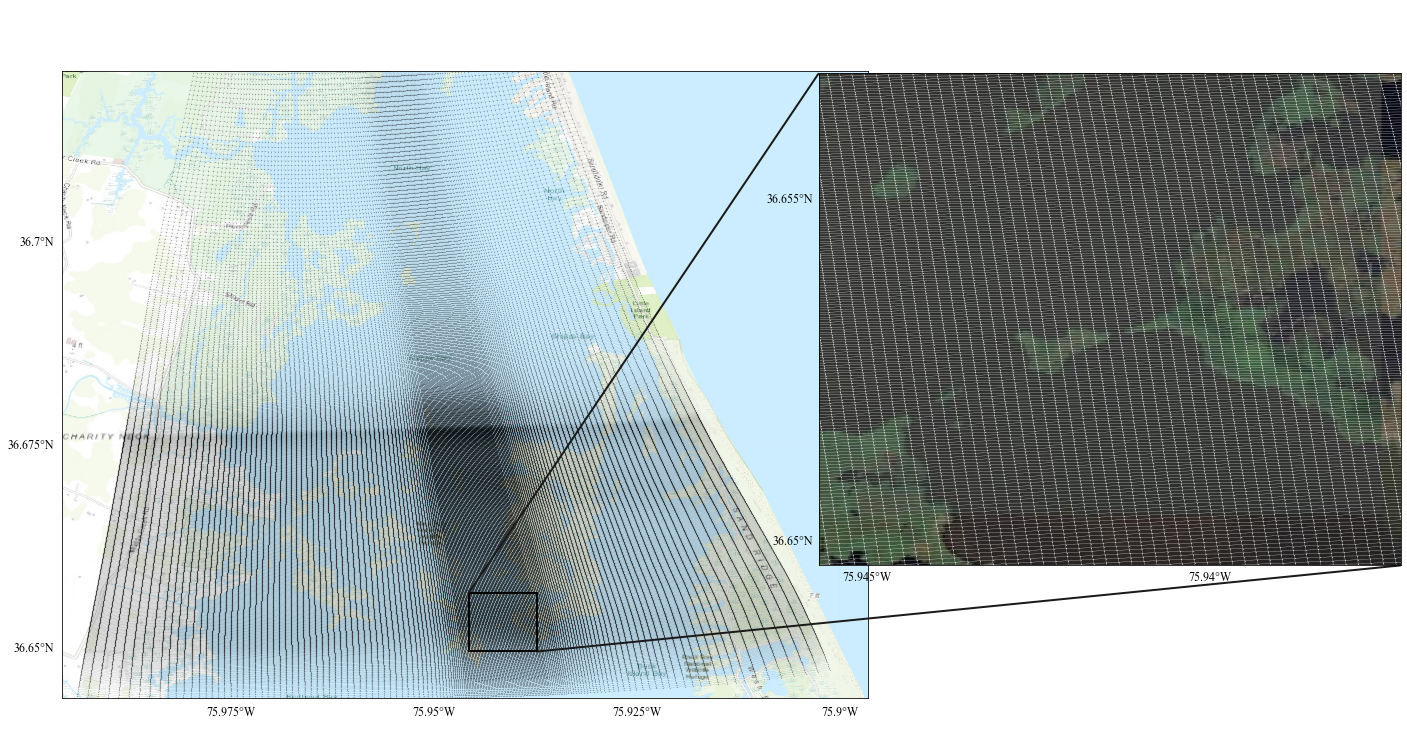

In [63]:
plt.rcParams["font.family"] = "Times New Roman"
fig = plt.figure(figsize=(16,10))
ax = fig.add_axes([0,0.,0.7,0.95])
ax0= fig.add_axes([0.405,0.,0.595,1],xticks=[],yticks=[],frame_on=False,facecolor=None)



# ----------------------------- US -------------------------------------------
lat1,lat2 = 36.6439,36.7211
lon1,lon2 = -75.9958,-75.8965
m = Basemap(llcrnrlat=lat1,urcrnrlat=lat2,
            llcrnrlon=lon1,urcrnrlon=lon2,resolution='h', epsg = 4269,ax=ax)
#Canvas/

m.arcgisimage(service='World_Topo_Map', xpixels=800,verbose=True,ax=ax)
#m.bluemarble()
m.drawparallels(np.arange(0, 100, 0.025), linewidth=0.01,labels=[1,0,0,0], color='#595959',fontsize=12)
m.drawmeridians(np.arange(0, 360, 0.025), linewidth=0.01, labels=[0,0,0,1],zorder=3,fontsize=12)
ax.plot(x,y,'.-',color='k',linewidth=0.05,markersize=0.1)
ax.plot(x.transpose(),y.transpose(),'.-',color='k',linewidth=0.05,markersize=0.1)
# -----------------------Chesapeake Bay-----------------------------------

lon1c,lat1c=-75.94571,36.64966
lon2c,lat2c=-75.93722,36.65684
ax_cb = zoomed_inset_axes(ax0,100, loc=4,bbox_to_anchor=(1., 0.2, 0.28, 0.45),
                          bbox_transform=ax0.transAxes)
mc = Basemap(llcrnrlat=lat1c,urcrnrlat=lat2c,
            llcrnrlon=lon1c,urcrnrlon=lon2c,resolution='l', epsg = 4269,ax=ax_cb)
mc.arcgisimage(service='World_Imagery', xpixels=240, verbose= False,ax=ax_cb)

ax_cb.plot(x,y,'.-',color='w',linewidth=0.25,markersize=0.25)
ax_cb.plot(x.transpose(),y.transpose(),'.-',color='w',linewidth=0.25,markersize=0.25)

mark_inset(ax, ax_cb, loc1=2, loc2=4, fc='None', ec='0.1',lw=2,color='white')
mc.drawparallels(np.arange(0, 100, 0.005), linewidth=0.01,labels=[1,0,0,0], color='#595959',fontsize=12)
mc.drawmeridians(np.arange(0, 360, 0.005), linewidth=0.01, labels=[0,0,0,1],zorder=3,fontsize=12)

plt.savefig('/Users/tmiesse/Downloads/xbmap.png',dpi=480,bbox_inches = 'tight', pad_inches = 0.1,transparent=True)
plt.show()

/Users/tmiesse/miniconda3/envs/geospatial/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  after removing the cwd from sys.path.


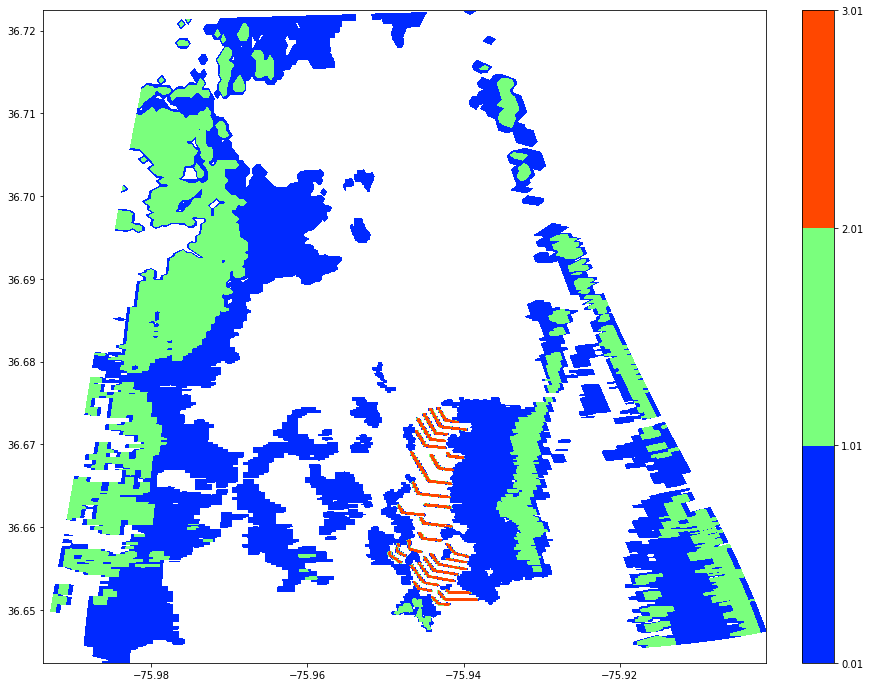

In [57]:
fig,ax = plt.subplots(figsize=(16,12))
levels = np.arange(0.01,4,1)
plt.contourf(x,y,new,cmap='jet',vmin=np.min(levels),vmax=np.max(levels),levels=levels)
plt.colorbar(cmap='jet',pad=0.04)
#ax.set_xlim([x.min(),x.max()])
#ax.set_ylim([y.min(),y.max()])
plt.show()

In [11]:
#write_2delft(root,vegebin,'vege.grd')
#write_2delft(root,x,'x.grd')
#write_2delft(root,y,'y.grd')
write_2delft(root,znew,'bed2.dep')

NameError: name 'write_2delft' is not defined

In [14]:
write_2delft(root,bedfrict,'bedfrict.grd')

In [13]:
#np.savetxt(root / 'vege2.grd',vegebin, fmt='%-4d')
#np.savetxt(root / 'x.grd',x, fmt='%.6e', delimiter='   ')
#np.savetxt(root / 'y.grd',y, fmt='%.6e', delimiter='   ')
np.savetxt(root / 'bed2.dep',znew, fmt='%.6e', delimiter='   ')
#np.savetxt(root / 'bedfrict.grd',bedfrict, fmt='%.4e', delimiter='   ')

In [4]:
stat_loc = [45.408,56.787,59.712,63.22]
idy = np.where((stat_loc[3]-1<x[:,0])&(x[:,0]<=stat_loc[3]+1))[0]

In [5]:
scen1 = [0.078,0.0213,0.0061,0.0022]
scen2 = [0.288,0.0791,0.0458,0.0227]

In [6]:
idy = [47,57,60,64]
idy2 = np.arange(47,64,1)

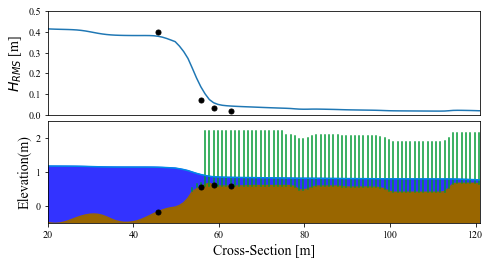

In [10]:
title = 'Flume High Water Low Waves'
title_save = title.split(' ')

stat_loc = [45.408,56.787,59.712,63.22]

fig = plt.figure(figsize=(6,3))
plt.rcParams["font.family"] = "Times New Roman"
ax1 = plt.axes([0,.5,1,.48])
ax2 = plt.axes([0,0,1,.47])
i = 3

#------
ax1.plot(x[:,0],xb.variables['H_mean'][i,0,:])

ax1.set_ylim([-0.,0.5])
ax1.set_xlim([20,121])
ax1.set_xticks([])
ax1.set_ylabel(r'$H_{RMS}$ [m]',fontsize=14)
#------
ax2.plot(x[:,0],xb.variables['zb_mean'][i,0,:],color='#996600')
barr     = ax2.fill_between(x[:,0],xb.variables['zb_mean'][i,0,:],(x[:,0]*0)-4,color='#996600')
vege = []
for ii in range(0,len(xb.variables['zb_mean'][i,0,:])):
    if (xb.variables['zb_mean'][0,0,ii]>0.35) & (50 < x[ii,0]) & (x[ii,0] <= 56):
        vege.append(0.08)
    elif (xb.variables['zb_mean'][0,0,ii]>0.35) & (56 < x[ii,0]) & (x[ii,0] <= 75):
        vege.append(1.62)
    elif (xb.variables['zb_mean'][0,0,ii]>0.35) & (75 < x[ii,0]):
        vege.append(1.5)
    else:
        vege.append(0)
for ii in range(0,len(vege)):
    
    vege2 = ax2.plot((x[ii,0],x[ii,0]),(z[0,0,ii],z[0,0,ii]+vege[ii]),color='#009933')
water = ax2.fill_between(x[:,0],xb.variables['zs_mean'][i,0,:]+xb.variables['H_mean'][i,0,:],xb.variables['zb_mean'][i,0,:],color='#3333ff')
waves = ax2.plot(x[:,0],xb.variables['zs_mean'][i,0,:]+xb.variables['H_mean'][i,0,:],color='#008ae6')
c = 0
dist = [-9.3, 0.71,5.2,8.59]
ax1.plot(x[idy,0],(0.0795 * np.exp(-0.1735*np.array(dist))),'.',markersize=10,color='k')
#ax1.plot(x[idy,0],(0.0094 * np.exp(-0.271*np.array(dist))),'.-',markersize=10,color='k')
for ix in idy:
    #ax1.plot(x[ix,0],(0.0094 * np.exp(-0.271*dist[c])),'.',markersize=10,color='k')
    #ax1.plot(x[ix,0],(0.0795 * np.exp(-0.1735*dist[c])),'.-',markersize=10,color='k')
    ax2.plot(x[ix,0],xb.variables['zb_mean'][i,0,ix],'.',markersize=10,color='k')
    c+=1
ax2.set_ylim([-0.5,2.5])
ax2.set_xlim([20,121])
ax2.set_ylabel('Elevation(m)',fontsize=14)
ax2.set_xlabel('Cross-Section [m]',fontsize=14)

plt.savefig(root / 'xbeach.png',dpi=450, bbox_inches = 'tight', pad_inches = 0.1)
plt.show()

In [11]:
0.0094 * np.exp(-0.271*dist[0])

0.11686386253804239

In [5]:
lat1,lat2 =36.6415005, 36.730011
lon1,lon2 = -75.999556, -75.885384

In [85]:
len(nlcd.keys())

21

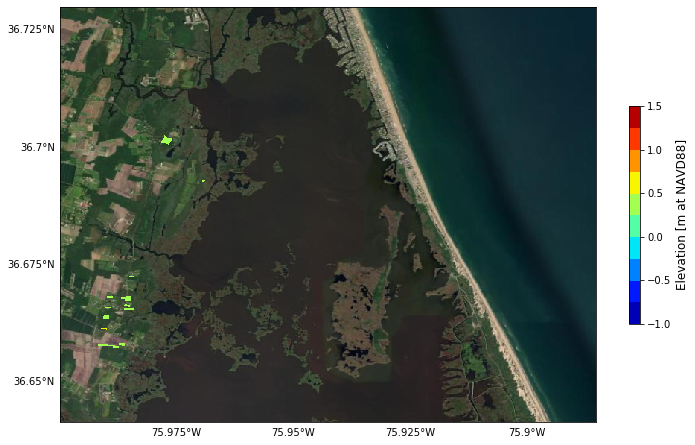

In [8]:
fig,ax = plt.subplots(figsize=(12,8))
#ax.plot(x,y,'w',linewidth=0.2)
#ax.plot(x.transpose(),y.transpose(),'w',linewidth=0.2)
limits = np.arange(-1,1.75,.25)
m = Basemap(projection='cyl',llcrnrlat=lat1,urcrnrlat=lat2,
            llcrnrlon=lon1,urcrnrlon=lon2,resolution='h', epsg=4326, ax=ax)
m.arcgisimage(service='World_Imagery',xpixels=720,ax=ax)
#h[h[:,:,:]==0]=np.nan
contour = ax.contourf(x,y,zs[2,:,:].data,cmap='jet',vmin=np.min(limits),vmax=np.max(limits),levels=limits)

cbar = plt.colorbar(contour,ax=ax,shrink=0.5)
cbar.set_label('Elevation [m at NAVD88]',fontsize=12)
#cbar.mappable.set_clim(np.min(limits),np.max(limits))
#cbar.ax.tick_params(labelsize=12)
m.drawparallels(np.arange(0, 100, 0.025), linewidth=0.0001,labels=[1,0,0,0], color='#595959')
m.drawmeridians(np.arange(0, 360, 0.025), linewidth=0.0001, labels=[0,0,0,1],zorder=3)
#ax.contourf(x,y,z[0,:,:],cmap='ocean',vmin=-0.25,vmax=0.5,alpha=0.1)
#ax.set_xlim([x.min()-0.001,x.max()+0.001])
#ax.set_ylim([y.min()-0.001,y.max()+0.001])
#plt.savefig(root /'xb_grid.png',dpi=480,bbox_inches = 'tight', pad_inches = 0.1)
plt.show()

In [17]:
np.max(zs[1,:,:])

0.9997678

In [5]:
lat1,lat2 =36.6425005, 36.645
lon1,lon2 = -75.9955, -75.970

In [30]:
idy = np.where((lat1<y)&(y<lat2))
idx = np.where((lon1<x)&(x<lon2))

In [6]:
znew = z[0,:,:]

In [7]:

s1,s2 = x.shape
for i in range(0,s1):
    for ii in range(0,s2):
        if ((lat1<y[i,ii])&(y[i,ii]<lat2)&(lon1<x[i,ii])&(x[i,ii]<lon2)):
            znew[i,ii] = znew[i,ii]-1.5




In [10]:
vege = np.loadtxt(root / 'vege2.grd')
bedfrict = np.loadtxt(root / 'bedfrict.grd')

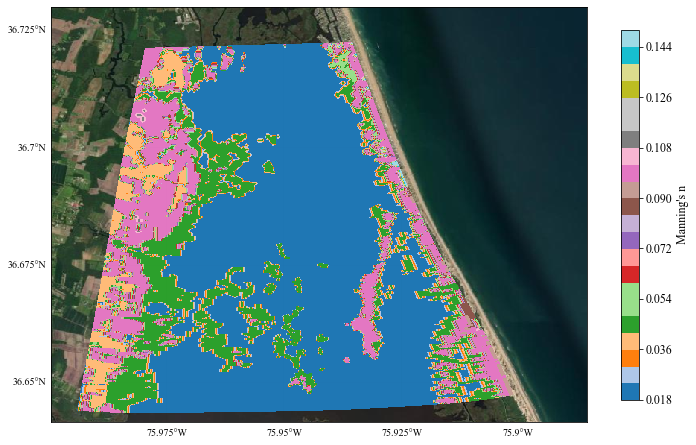

In [111]:
fig,ax = plt.subplots(figsize=(12,8))
plt.rcParams["font.family"] = "Times New Roman"
#ax.plot(x,y,'w',linewidth=0.2)
#ax.plot(x.transpose(),y.transpose(),'w',linewidth=0.2)
#limits = np.arange(0.1,1,0.5)
m = Basemap(projection='cyl',llcrnrlat=lat1,urcrnrlat=lat2,
            llcrnrlon=lon1,urcrnrlon=lon2,resolution='h', epsg=4326, ax=ax)
m.arcgisimage(service='World_Imagery',xpixels=720,ax=ax)
#h[h[:,:,:]==0]=np.nan
limits,cs = [],[]
names = []
for n in nlcd:
    limits.append(nlcd[n]['value'])
    cs.append(nlcd[n]['color'])
    names.append(nlcd[n]['label'])
#    contour = ax.scatter(x[bedfrict==nlcd[n]['value']],y[bedfrict==nlcd[n]['value']],c=nlcd[n]['color'],s=5,cmap='jet')
df = pd.DataFrame({'values':limits,'color':cs,'names':names})
df2 = df.sort_values(by='values',ascending=True)


contour = ax.contourf(x,y,bedfrict,levels=len(nlcd.keys()),cmap='tab20')
cbar = plt.colorbar(contour,ax=ax,shrink=.85)
cbar.set_label("Manning's n",fontsize=12)
#cbar.mappable.set_clim(np.min(limits),np.max(limits))
#cbar.set_ticks(np.arange(np.min(limits),np.max(limits),np.max(limits)/20))
#cbar.set_ticklabels(names)  # horizontal colorbar
cbar.ax.tick_params(labelsize=12)
m.drawparallels(np.arange(0, 100, 0.025), linewidth=0.01,labels=[1,0,0,0], color='#595959')
m.drawmeridians(np.arange(0, 360, 0.025), linewidth=0.01, labels=[0,0,0,1],zorder=3)
#ax.contourf(x,y,z[0,:,:],cmap='ocean',vmin=-0.25,vmax=0.5,alpha=0.1)
#ax.set_xlim([x.min()-0.001,x.max()+0.001])
#ax.set_ylim([y.min()-0.001,y.max()+0.001])
plt.savefig(root /'xb_frict.png',dpi=480,bbox_inches = 'tight', pad_inches = 0.1)
plt.show()

In [12]:
xx,yy = x.shape
vege = np.zeros((xx,yy))
bed  = np.zeros((xx,yy))
z0 = z[0,:,:]

In [13]:
mannings = [0.025,0.02,0.05,0.160]#channel,ocean,marsh, tree
v_heights = [1,2,3,0]#marsh,beach,tress,none
x1,y1 = x.shape
for i in range(0,x1):
    for ii in range(0,y1):
        if z0[i,ii]<-.01 :#and x[i,ii]>-75.955 and y[i,ii]<38.1485:
            bed[i,ii] = mannings[0]
        elif .05 < z0[i,ii] < 0.6:# and -75.955 < x[i,ii] < -75.954 and 38.1487<y[i,ii]<38.1495:
            vege[i,ii] = v_heights[1]
        elif z0[i,ii]<-.01:# and x[i,ii]>-75.95325:
            bed[i,ii] = mannings[0]
        elif -0.05<z0[i,ii]<0.7:# and x[i,ii]>-75.955:
            bed[i,ii] = mannings[2]
            vege[i,ii]=v_heights[0]
        elif z0[i,ii]>0.7:
            bed[i,ii] = mannings[3]
            vege[i,ii]=v_heights[2]
        else:
            bed[i,ii] = mannings[1]
            vege[i,ii]=v_heights[3]



In [14]:
xbi.write_2delft(root,vege,'temp.txt')

In [15]:
xbi.write_2delft(root,bed,'bedfrict.txt')

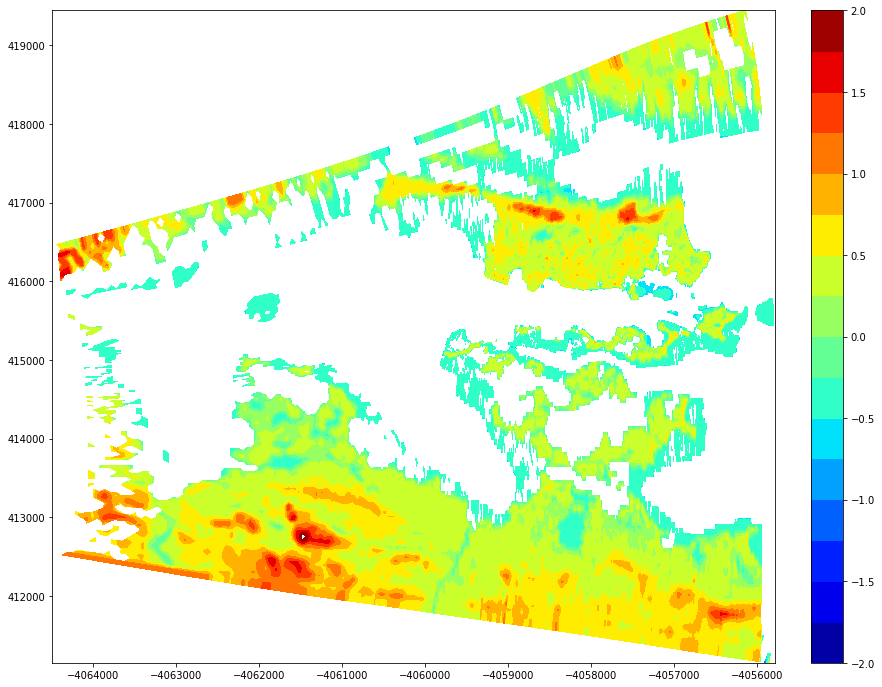

In [14]:
fig,ax = plt.subplots(figsize=(16,12))
levels = np.arange(-2,2.1,.25)
plt.contourf(x,y,zs[1,:,:],cmap='jet',vmin=np.min(levels),vmax=np.max(levels),levels=levels)
plt.colorbar(cmap='jet',pad=0.04)
#ax.set_xlim([x.min(),x.max()])
#ax.set_ylim([y.min(),y.max()])
plt.show()

In [ ]:
infile = ''

nodes = {'1':[],'3':[],'23':[],'39':[],'43':[],'75':[],'2123':[],'2656':[],'2354':[],'265665':[],'1685434':[]}

#------------------------------BEGIN SCRIPT----------------------------------#
a = dt.now()
print("\n Started reading Global File at \n") 
print(a)

f = fileinput.input(infile)

for line in f:
    n = line.strip().split(' ')[0] 
    if n in nodes:
        nodes[n].append(line)

for n in nodes:    
    output = open('extracted_%s.txt' %(n),'w')
    header = "      NODE                  SWEL\n"
    output.write(header)
    for i in range(len(nodes[n])):
        output.write(nodes[n][i])

output.close(); fileinput.close()
    
b = dt.now()
c = b-a
print("===========END========== \n")
print("Processing Time : ")
print(c)

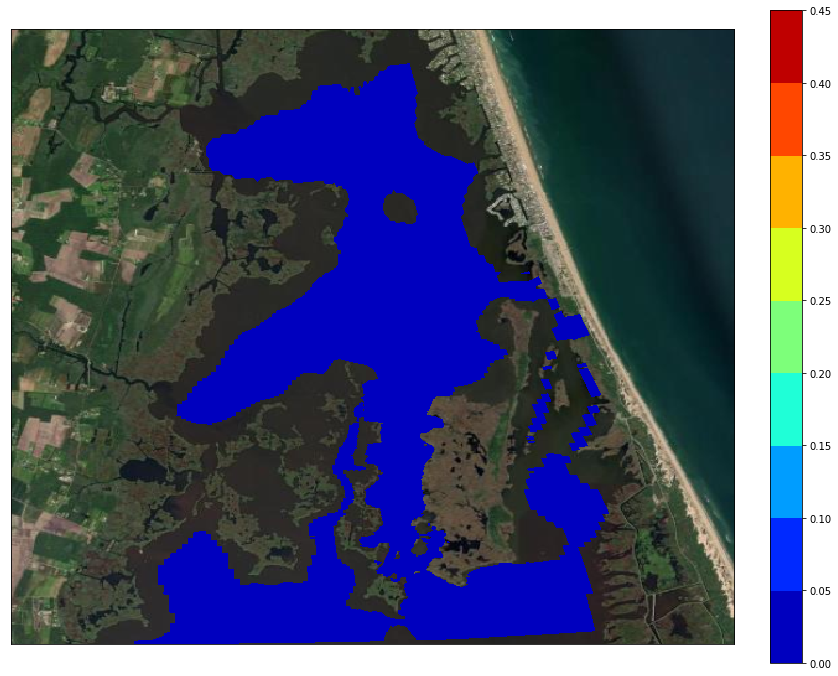

In [27]:
fig,ax = plt.subplots(figsize=(16,12))
#cmap = mpl.cm.get_cmap('jet')  
#normalize = mpl.colors.Normalize(vmin=.01, vmax=.03)
#colors = [cmap(normalize(value)) for value in bed.reshape(x1*y1)]
m = Basemap(projection='cyl',llcrnrlat=lat1,urcrnrlat=lat2,
            llcrnrlon=lon1,urcrnrlon=lon2,resolution='h', epsg=4326, ax=ax)
m.arcgisimage(service='World_Imagery',xpixels=720,ax=ax)
levels = np.arange(0,0.5,0.05)
plt.contourf(x,y,h[0],cmap='jet',vmin=np.min(levels), vmax=np.max(levels),levels=levels)
plt.colorbar(cmap='jet',pad=0.04)
ax.set_xlim([x.min(),x.max()])
ax.set_ylim([y.min(),y.max()])
plt.show()

In [25]:
np.max(h)

0.0017836061535253295

In [86]:
limits = np.arange(0,0.75,.05)
#h[h[:,:,:]==0]=np.nan
wl = []
for i in range(15,20):
    fig,ax = plt.subplots(figsize=(6,4))
    file_number = '%05d'%i

    m = Basemap(projection='cyl',llcrnrlat=lat1,urcrnrlat=lat2,
                llcrnrlon=lon1,urcrnrlon=lon2,resolution='h', epsg = 4326,ax=ax)
    m.arcgisimage(service='World_Imagery',xpixels=480,ax=ax)
    
    contour = ax.contourf(x,y,h[i,:,:].data,cmap='jet',vmin=np.min(limits),vmax=np.max(limits),levels=limits)
    wl.append('WL{}.png'.format(file_number))
    cbar = plt.colorbar(contour,ax=ax,shrink=0.5)
    cbar.set_label(r'$H_{s}$ [m]',fontsize=12)
    cbar.mappable.set_clim(np.min(limits),np.max(limits))
    cbar.ax.tick_params(labelsize=12)
    m.drawparallels(np.arange(0, 100, 0.001), linewidth=0.01,labels=[1,0,0,0], color='#595959')
    m.drawmeridians(np.arange(0, 360, 0.001), linewidth=0.01, labels=[0,0,0,1],zorder=3)
    #ax.contourf(x,y,z[0,:,:],cmap='ocean',vmin=-0.25,vmax=0.5,alpha=0.1)
    #ax.set_xlim([x.min(),x.max()])
    #ax.set_ylim([y.min(),y.max()])
    plt.savefig('WL{}.png'.format(file_number),dpi=300,
                bbox_inches = 'tight', pad_inches = 0.1)
    plt.close()
images = []
for ii in range(0,len(wl)):
    frames = Image.open(wl[ii])
    images.append(frames)
images[0].save('xb_hs.gif',
   save_all=True,
   append_images=images[1:],
   delay=.05,
   duration=200,
   loop=0)
for f in glob.glob('WL*'):
    os.remove(f)   

#### Create 2d contour map

In [92]:
np.where(h[:,:,:]==np.max(h[:,:,:]))

(array([17]), array([296]), array([2]))

In [90]:
np.max(h[:,:,:])

nan

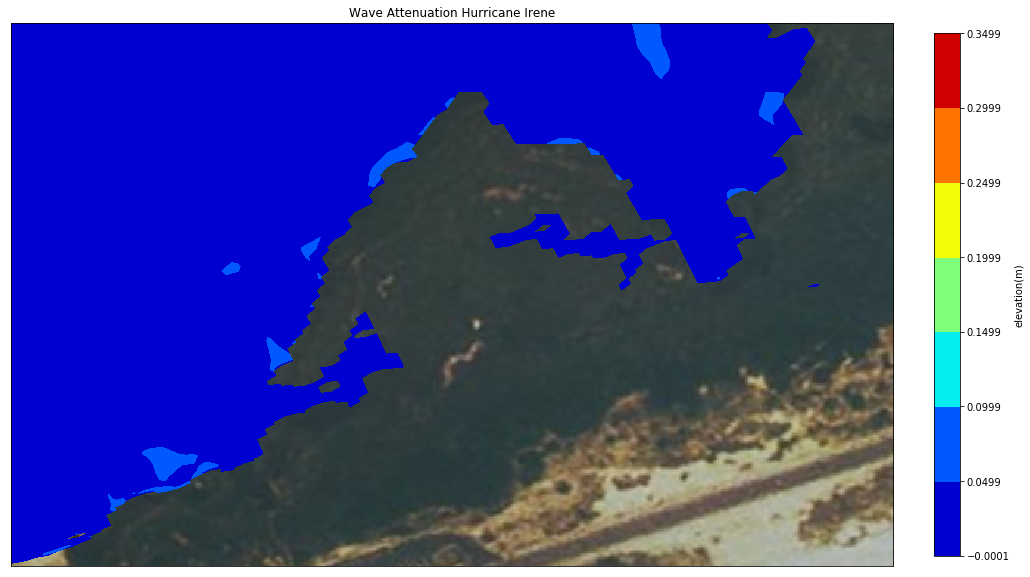

In [93]:
lat1,lat2 =35.221004,35.223522
lon1,lon2 =-75.657993, -75.653904
title = 'Wave Attenuation Hurricane Irene'
levels = np.arange(-0.0001,0.35,0.05)
xbeach.contour_map(x,y,z[0,:,:],h[17,:,:],title,levels,lat1,lat2,lon1,lon2)

#### Find Observation Stations

In [18]:
station_x = [-75.953653,-75.953486,-75.953338,-75.952953] # s1,s2,s3,s4
station_y = [38.151136,38.151207,38.151208,38.151215]
gridx,gridy = [], []
for i in range(0,4):
    node = xbeach.find_node_ak(x,y,station_y[i],station_x[i])
    gridx.append(node[0])
    gridy.append(node[1])

#### Generate Model stations

In [19]:
water = xbeach.correct_hobo(str(hobos / 't1.mat'))
time = pd.date_range(start=pd.to_datetime('2018-09-12 19'),periods=int(len(zs[:,gridx[0],gridy[0]])),freq='20min')
model = pd.DataFrame({'date time':time,'s1':zs[:,gridx[0],gridy[0]],'s2':zs[:,gridx[1],gridy[1]],
                      's3':zs[:,gridx[2],gridy[2]],'s4':zs[:,gridx[3],gridy[3]]})

#### Generate 2d contour video with observation stations

In [ ]:
lat1,lat2 = np.min(y),np.max(y)
lon1,lon2 = np.min(x),np.max(x)
title = 'Deal Island'
levels = np.arange(-0.3,2,0.1)
start,time = '2018091219', 280 
title = 'Deal Island '
xbeach.contour_stations(x,y,zs,water,gridx,gridy,model,start,time,title,levels,lat1,lat2,lon1,lon2)

<div align="middle"><img style="float:center;" src="xbeach2d.gif" width=1000px></div>

#### Generate 3d video

In [ ]:
title = 'Deal Island'
levels = np.arange(-0.3,1.50001,0.1)
start,time = '2018091219',280
title = 'Deal Island '
xbeach.video_3d(x,y,z,h+zs,start,time,title,levels)

<div align="middle"><img style="float:center;" src="xbeach3d.gif" width=900px></div>

#### Generate Contour video with velocity vectors

In [ ]:
lat1,lat2 = np.min(y),np.max(y)
lon1,lon2 = np.min(x),np.max(x)
title = 'Deal Island'
levels = np.arange(-0.3,1.5,0.1)
start,time = '2018091219',280
xbeach.map_velocity(x,y,zs,u,v,start,time,title,levels,lat1,lat2,lon1,lon2,gridspace=75)

<div align="middle"><img style="float:center;" src="xbeach_velocity.gif" width=900px></div>

#### Max velocity in the model

In [7]:
np.max(np.sqrt(np.square(u)+np.square(v)))

0.6554845707896482